In [1]:
import re #regular expression
import numpy as np
import pandas as pd #dataframe
import glob, os #retrieve files/pathnames matching a specified pattern
import seaborn as sns #visualization library
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.ticker as mticker
import matplotlib.font_manager #font of plots
import jieba #chinese word cutting
import string #import string, which is where we get a list of punctuation

## 1. Data

In [2]:
## import data
## Data are not open-source
# guangming daily
df_excel = pd.read_excel('/Users/jinyang/Library/CloudStorage/OneDrive-UBC/Thesis/Newspapers/guangming_daily.xlsx')
# people's daily
df_csv = pd.read_csv('/Users/jinyang/Library/CloudStorage/OneDrive-UBC/Thesis/Newspapers/peoples_daily.csv', encoding='utf-8')

In [3]:
# Check the first few rows of the dataframes to ensure characters are read correctly
df_excel

Title        Date  \
0                          略论法国“新浪潮”电影  1963.03.13   
1                       “自取灭亡的企业”（附图片）  1963.08.27   
2           《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序  1982.08.05   
3    无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严  1983.02.12   
4                         畸形社会畸形病（附图片）  1983.09.18   
..                                 ...         ...   
334                         弱首相难推“硬脱欧”  2017.06.13   
335                               纽约故事  2017.06.16   
336                    美国底层民众生活侧记（附图片）  2017.12.13   
337        规则面前　一视同仁\n美国学术打假“老虎苍蝇”都不放过  2018.02.05   
338            “花样美男”盛行，男子气概是否要拯救（附图片）  2018.07.25   

                                                  Body  
0    一阵世纪末的风在西方吹荡\n　　近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈...  
1    好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...  
2    《红楼梦》研究该有一个突破了：普通读者早就这样盼望。\n　　《红楼梦》研究的现状是怎样的呢？...  
3    编辑部：\n　　最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，...  
4    常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...  
..                                                 ...  
334  在经历了一场自导自演的提前大选之后，英国首相特雷莎·梅领导的保守党不仅未能如愿巩固执政地位，...  
335  压抑，是我合上白先勇的小说《纽约客》之后，脑中第一个蹦出来的词。我长久地注视着书封。\n　　...  
336  美国纽约市曼哈顿中城11日发生爆炸，导致4人受伤。纽约市长德布拉西奥说，这是“一起未遂恐怖袭...  
337  日本京都大学诱导多能干细胞（iPS细胞）研究所学术造假丑闻近日曝光后，舆论哗然。其实，学术造...  
338  2010年，笔者去韩国首尔的梨花女子大学参加一个学术会议时，听到几位与会西方教授，颇不以为然...  

[339 rows x 3 columns]

In [4]:
df_csv

Title        Date  \
0               市长选举与美国式民主  1980-03-13   
1                美国保守主义的派别  1981-02-19   
2                 《美国之旅》后记  1984-02-10   
3            西方的获得性免疫缺损综合症  1985-03-01   
4                    美国来的信  1985-03-20   
..                     ...         ...   
203        网络电影应纳入法律（聚焦审议）  2016-11-02   
204     全球接受艾滋病“救命疗法”的人数翻倍  2016-11-23   
205       美国主流媒体病症透析（人民观察）  2016-12-04   
206          2016年美国侵犯人权事记  2017-03-10   
207  慢性乙肝应长期治疗（健康之道·细说肝病②）  2018-06-01   

                                                  Body  
0    本报记者　张彦　　我们访问旧金山期间，正好赶上改选市长、督察员、检察官和行政司法官，报纸和电...  
1    里根总统和财政部长唐纳德·里甘（右二）等在办公室审查联邦开支。(人民数据库资料)里根总统的就...  
2    １　　这是一本访问美国之后所得的诗篇。　　１９８２年秋，我作为中国作家代表团的成员之一，到洛...  
3    近年来，一种使人感到恐惧、厌恶、羞耻和神秘的病——获得性免疫缺损综合症，正日益广泛和迅速地在...  
4    说老实话，小李，我个人认为，美国父母在这方面，实在对他们的子女太纵容了，给了他们太多的自由了...  
..                                                 ...  
203  本报记者 王比学　　10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法...  
204  据新华社日内瓦11月21日电  （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...  
205  张天培　　2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未...  
206  一月　　4日  《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一...  
207  王 宇　　对于成年人来讲，感染乙肝后大部分能自行恢复，发展为慢性乙肝的可能仅为5%左右。但新...  

[208 rows x 3 columns]

In [5]:
# Add a source column to each dataframe
df_excel['Source'] = 'Guangming Daily'  # For entries from Guangming Daily
df_csv['Source'] = 'People\'s Daily'    # For entries from People's Daily

In [6]:
# Concatenate the dataframes
combined_df = pd.concat([df_excel, df_csv], ignore_index=True)

# Check the combined dataframe
combined_df

Title        Date  \
0                          略论法国“新浪潮”电影  1963.03.13   
1                       “自取灭亡的企业”（附图片）  1963.08.27   
2           《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序  1982.08.05   
3    无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严  1983.02.12   
4                         畸形社会畸形病（附图片）  1983.09.18   
..                                 ...         ...   
542                    网络电影应纳入法律（聚焦审议）  2016-11-02   
543                 全球接受艾滋病“救命疗法”的人数翻倍  2016-11-23   
544                   美国主流媒体病症透析（人民观察）  2016-12-04   
545                      2016年美国侵犯人权事记  2017-03-10   
546              慢性乙肝应长期治疗（健康之道·细说肝病②）  2018-06-01   

                                                  Body           Source  
0    一阵世纪末的风在西方吹荡\n　　近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈...  Guangming Daily  
1    好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...  Guangming Daily  
2    《红楼梦》研究该有一个突破了：普通读者早就这样盼望。\n　　《红楼梦》研究的现状是怎样的呢？...  Guangming Daily  
3    编辑部：\n　　最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，...  Guangming Daily  
4    常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...  Guangming Daily  
..                                                 ...              ...  
542  本报记者 王比学　　10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法...   People's Daily  
543  据新华社日内瓦11月21日电  （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...   People's Daily  
544  张天培　　2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未...   People's Daily  
545  一月　　4日  《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一...   People's Daily  
546  王 宇　　对于成年人来讲，感染乙肝后大部分能自行恢复，发展为慢性乙肝的可能仅为5%左右。但新...   People's Daily  

[547 rows x 4 columns]

In [7]:
# make forms of date the same
# Assuming combined_df is your dataframe and 'date' is the column with the dates
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Convert 'Date' to datetime to extract the year
combined_df['Year'] = combined_df['Date'].dt.year

# Format the dates in the '1983-10-12' style
combined_df['Date'] = combined_df['Date'].dt.strftime('%Y-%m-%d')

# Check the results
combined_df

Title        Date  \
0                          略论法国“新浪潮”电影  1963-03-13   
1                       “自取灭亡的企业”（附图片）  1963-08-27   
2           《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序  1982-08-05   
3    无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严  1983-02-12   
4                         畸形社会畸形病（附图片）  1983-09-18   
..                                 ...         ...   
542                    网络电影应纳入法律（聚焦审议）  2016-11-02   
543                 全球接受艾滋病“救命疗法”的人数翻倍  2016-11-23   
544                   美国主流媒体病症透析（人民观察）  2016-12-04   
545                      2016年美国侵犯人权事记  2017-03-10   
546              慢性乙肝应长期治疗（健康之道·细说肝病②）  2018-06-01   

                                                  Body           Source  Year  
0    一阵世纪末的风在西方吹荡\n　　近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈...  Guangming Daily  1963  
1    好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...  Guangming Daily  1963  
2    《红楼梦》研究该有一个突破了：普通读者早就这样盼望。\n　　《红楼梦》研究的现状是怎样的呢？...  Guangming Daily  1982  
3    编辑部：\n　　最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，...  Guangming Daily  1983  
4    常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...  Guangming Daily  1983  
..                                                 ...              ...   ...  
542  本报记者 王比学　　10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法...   People's Daily  2016  
543  据新华社日内瓦11月21日电  （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...   People's Daily  2016  
544  张天培　　2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未...   People's Daily  2016  
545  一月　　4日  《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一...   People's Daily  2017  
546  王 宇　　对于成年人来讲，感染乙肝后大部分能自行恢复，发展为慢性乙肝的可能仅为5%左右。但新...   People's Daily  2018  

[547 rows x 5 columns]

In [8]:
#remove \n, \u3000, and ' ' in the body
combined_df['Body'] = combined_df['Body'].replace('[\n\u3000]+', ' ', regex=True)

# Check the results
combined_df.head()

Title        Date  \
0                        略论法国“新浪潮”电影  1963-03-13   
1                     “自取灭亡的企业”（附图片）  1963-08-27   
2         《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序  1982-08-05   
3  无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严  1983-02-12   
4                       畸形社会畸形病（附图片）  1983-09-18   

                                                Body           Source  Year  
0  一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个...  Guangming Daily  1963  
1  好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...  Guangming Daily  1963  
2  《红楼梦》研究该有一个突破了：普通读者早就这样盼望。 《红楼梦》研究的现状是怎样的呢？从哪里...  Guangming Daily  1982  
3  编辑部： 最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，并追究...  Guangming Daily  1983  
4  常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...  Guangming Daily  1983

In [9]:
# Define the CSV file path
csv_file_path = '/Users/jinyang/Library/CloudStorage/OneDrive-UBC/Thesis/Newspapers/all.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

### Lengths of Articles (Characters)

In [10]:
## Lengths of Articles per year for each newspaper

# Calculate the length of each entry (assuming the 'Body' column contains the entry text)
combined_df['Entry Length'] = combined_df['Body'].apply(len)

# Sum the total length of entries per year for each newspaper
total_length_per_year_newspaper = combined_df.groupby(['Year', 'Source'])['Entry Length'].sum().reset_index(name='Total Length')

total_length_per_year_newspaper.head()

Year           Source  Total Length
0  1963  Guangming Daily          4593
1  1980   People's Daily          1331
2  1981   People's Daily          1577
3  1982  Guangming Daily          4369
4  1983  Guangming Daily          2297

In [11]:
# the shortest article, the longest article, and the mean of lengths of articles
min_length = np.min(combined_df['Entry Length'])
avg_length = np.mean(combined_df['Entry Length'])
max_length = np.max(combined_df['Entry Length'])
print (min_length)
print (avg_length)
print(max_length)

69
1769.0932358318098
31787


## 2. Number of Articles

In [12]:
# Group by 'Year' and 'Source' (newspaper) and count the entries
entries_per_year_and_newspaper = combined_df.groupby(['Year', 'Source']).size().reset_index(name='Count')

# Output the result
entries_per_year_and_newspaper

Year           Source  Count
0   1963  Guangming Daily      2
1   1980   People's Daily      1
2   1981   People's Daily      1
3   1982  Guangming Daily      1
4   1983  Guangming Daily      2
..   ...              ...    ...
68  2016   People's Daily     10
69  2017  Guangming Daily      4
70  2017   People's Daily      1
71  2018  Guangming Daily      2
72  2018   People's Daily      1

[73 rows x 3 columns]

In [13]:
# pivot the dataframe to make the newspapers become the column
entries_per_year_newspaper = entries_per_year_and_newspaper.pivot(index='Year', columns='Source', values='Count').fillna(0)

# Assuming pivoted_df is your DataFrame
entries_per_year_newspaper = entries_per_year_newspaper.iloc[1:]

entries_per_year_newspaper

Source  Guangming Daily  People's Daily
Year                                   
1980                0.0             1.0
1981                0.0             1.0
1982                1.0             0.0
1983                2.0             0.0
1984                0.0             1.0
1985                5.0             9.0
1986                3.0             6.0
1987                7.0             8.0
1988                8.0             8.0
1989               11.0            14.0
1990                4.0             6.0
1991                1.0             6.0
1992                4.0             2.0
1993               22.0             9.0
1994                5.0             2.0
1995               13.0             4.0
1996               11.0             6.0
1997                4.0             0.0
1998               12.0             5.0
1999               14.0             5.0
2000               14.0            11.0
2001                9.0             4.0
2002               13.0             1.0
2003               14.0             7.0
2004               16.0            14.0
2005                8.0             8.0
2006               17.0             4.0
2007                2.0             7.0
2008                1.0             4.0
2009               12.0             8.0
2010                6.0            10.0
2011               17.0             8.0
2012               12.0             3.0
2013               19.0             6.0
2014               13.0             4.0
2015               17.0             4.0
2016               14.0            10.0
2017                4.0             1.0
2018                2.0             1.0

In [14]:
# Assuming 'Year' is the index and you want to extend the range to 2023
min_year = entries_per_year_newspaper.index.min()
max_year = 2023

# Create a new range of years
extended_years = range(min_year, max_year + 1)  # Include 2023 in the range

# If you're reindexing to extend the DataFrame
extended_epyn = entries_per_year_newspaper.reindex(extended_years, fill_value=0)

# Convert the entire DataFrame to integer type to avoid floating point numbers like 2.0
extended_epyn = extended_epyn.astype(int)

# Now 'extended_df' includes all years up to 2023, with missing years filled with 0
extended_epyn

Source  Guangming Daily  People's Daily
Year                                   
1980                  0               1
1981                  0               1
1982                  1               0
1983                  2               0
1984                  0               1
1985                  5               9
1986                  3               6
1987                  7               8
1988                  8               8
1989                 11              14
1990                  4               6
1991                  1               6
1992                  4               2
1993                 22               9
1994                  5               2
1995                 13               4
1996                 11               6
1997                  4               0
1998                 12               5
1999                 14               5
2000                 14              11
2001                  9               4
2002                 13               1
2003                 14               7
2004                 16              14
2005                  8               8
2006                 17               4
2007                  2               7
2008                  1               4
2009                 12               8
2010                  6              10
2011                 17               8
2012                 12               3
2013                 19               6
2014                 13               4
2015                 17               4
2016                 14              10
2017                  4               1
2018                  2               1
2019                  0               0
2020                  0               0
2021                  0               0
2022                  0               0
2023                  0               0

In [15]:
# Define the CSV file path
csv_file_path = '/Users/jinyang/Library/CloudStorage/OneDrive-UBC/Thesis/Newspapers/counts.csv'

# Save the DataFrame to a CSV file
extended_epyn.to_csv(csv_file_path, index=False)

In [16]:
# have completed the calculation in the excel file

In [17]:
# Load the CSV file
file_path = '/Users/jinyang/Library/CloudStorage/OneDrive-UBC/Thesis/Newspapers/percentages.csv'
per_articles = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
per_articles.head()

Year  Guangming Daily  People's Daily
0  1980         0.000000        0.003476
1  1981         0.000000        0.003352
2  1982         0.007204        0.000000
3  1983         0.012367        0.000000
4  1984         0.000000        0.003037

In [18]:
# Calculate the average percentage across all years for both newspapers
average_percentage = per_articles[['Guangming Daily', 'People\'s Daily']].mean().mean()

In [19]:
per_articles['Year'] = per_articles['Year'].astype(int)  # Convert 'Year' to int for plotting
per_articles.head()

Year  Guangming Daily  People's Daily
0  1980         0.000000        0.003476
1  1981         0.000000        0.003352
2  1982         0.007204        0.000000
3  1983         0.012367        0.000000
4  1984         0.000000        0.003037

In [20]:
# Calculating 2-year rolling average for each newspaper
per_articles['Guangming Daily RA'] = per_articles['Guangming Daily'].rolling(window=2).mean()
per_articles['People\'s Daily RA'] = per_articles['People\'s Daily'].rolling(window=2).mean()
per_articles.head()

Year  Guangming Daily  People's Daily  Guangming Daily RA  \
0  1980         0.000000        0.003476                 NaN   
1  1981         0.000000        0.003352            0.000000   
2  1982         0.007204        0.000000            0.003602   
3  1983         0.012367        0.000000            0.009786   
4  1984         0.000000        0.003037            0.006184   

   People's Daily RA  
0                NaN  
1           0.003414  
2           0.001676  
3           0.000000  
4           0.001519

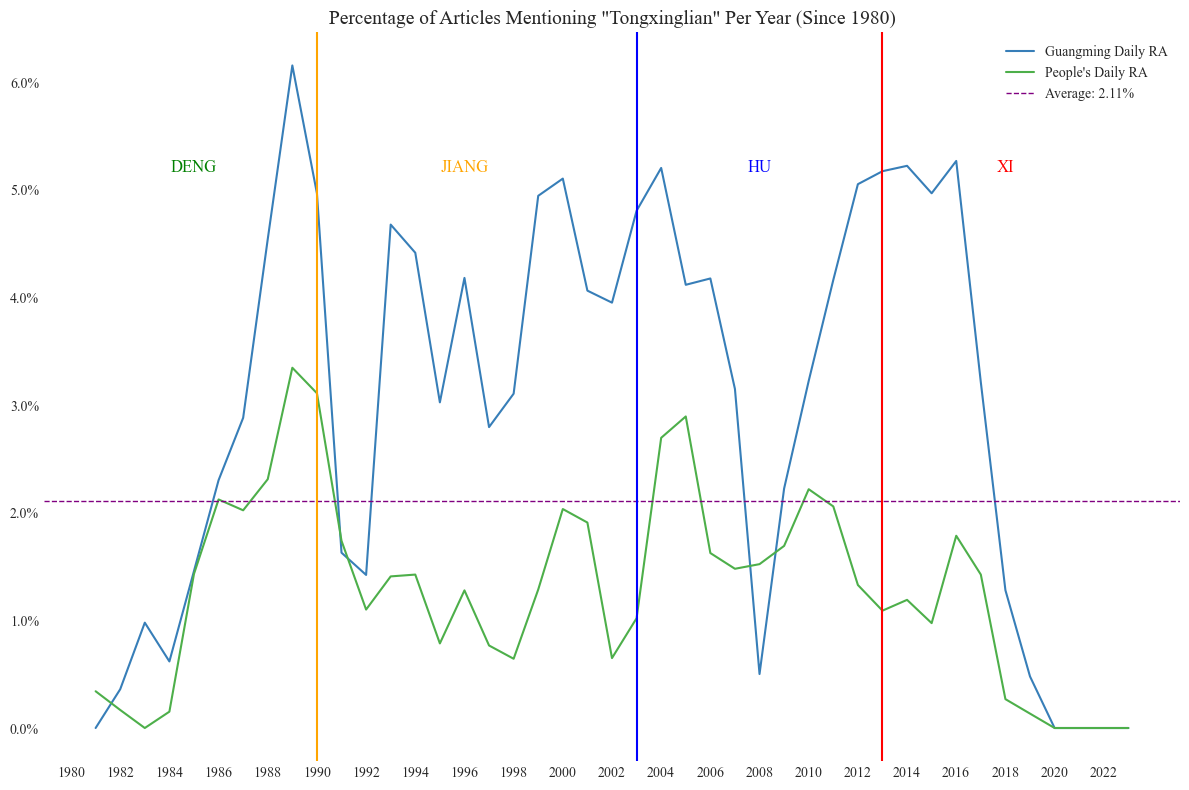

In [82]:
# Set the style
plt.style.use('seaborn-darkgrid')

plt.rcParams['font.family'] = 'Times New Roman'

# Create a color palette
palette = plt.get_cmap('Set1')

# Plot as a line plot
fig, ax = plt.subplots(figsize=(12, 8))
for column, color in zip(['Guangming Daily RA', 'People\'s Daily RA'], [palette(1), palette(2)]):
    ax.plot(per_articles['Year'], per_articles[column], label=column, color=color)

# Draw a horizontal line for the average percentage
# Assuming you have calculated the average_percentage earlier
ax.axhline(y=average_percentage, color='purple', linestyle='--', linewidth=1, label=f'Average: {average_percentage*100:.2f}%')

# Format the y-axis tick labels to show as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

# Remove the grid
ax.grid(False)

# Set background color
fig.set_facecolor('white')  # Sets the figure background color
ax.set_facecolor('white')   # Sets the axes area background color

# Set titles
plt.title('Percentage of Articles Mentioning "Tongxinglian" Per Year (Since 1980)',fontsize=14)

ax.axvline(x=1990, color='orange')
ax.axvline(x=2003, color='blue')
ax.axvline(x=2013, color='red')
        

# Annotate leaders
leader_annotations = [(1985, 'DENG', 'green'), (1996, 'JIANG', 'orange'), (2008, 'HU', 'blue'), (2018, 'XI', 'red')]
for year, name, color in leader_annotations:
    ax.annotate(name, xy=(year, 0.05), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize=12, color=color)

# Customizing the plot further
plt.legend(title='')
#plt.xticks(rotation=45)
plt.xticks(np.arange(1980, 2024, step=2),fontsize=10) #set font and size of year on x-axis
plt.tight_layout()

# Show the plot
plt.show()

## 3. Word Frequency

In [22]:
#save all articles to the text variable
text=combined_df['Body'].str.cat(sep='\n')

# Filter the combined dataframe by source and concatenate the 'Body' texts for Guangming Daily
guangming_daily_text = combined_df[combined_df['Source'] == 'Guangming Daily']['Body'].str.cat(sep='\n')

# Filter the combined dataframe by source and concatenate the 'Body' texts for People's Daily
peoples_daily_text = combined_df[combined_df['Source'] == "People's Daily"]['Body'].str.cat(sep='\n')


In [23]:
guangming_daily_text

'一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个问题的时候，又往往牵涉到法国“新浪潮”电影。“新浪潮”是一阵世纪末的风，在西方资本主义世界吹荡，对西方国家的电影发生了相当大的影响；它的出现在本世纪的五十年代，不是偶然的，它是现代资产阶级反动腐朽文艺思想在电影领域内的表现，是带着鲜明的时代特征的。 法国“新浪潮”电影产生于1959年。那时候，戴高乐掌握了法国的政权，正在加紧对阿尔及利亚的侵略战争，庞大的军事开支，压在人民的肩膀上，物价高涨，社会动荡不安，国内的阶级矛盾尖锐化了。同时，美帝国主义日益疯狂地扩军备战，不断发出热核战争的恫吓，西方世界充满着战争的歇斯特里。法国资产阶级和小资产阶级知识分子，面对这样的局面，感到苦闷，彷徨，找不到出路。在这动荡的社会基础上，一片思想混乱和逃避现实的文学流派“新小说派”产生了。电影方面，“新浪潮”这样的流派也早已出现了。 当然，“新浪潮”的出现，还有法国电影界本身的原因。1955年起，法国电影创作停滞不前，电影市场充斥着平庸的作品，不受观众欢迎；许多老导演又被认为“保守”，不敢创新。一些青年电影工作者，由于得不到电影制片厂老板的重视，就开始自己集资拍摄影片，并提出“打破一切陈规旧套”，“表现自己思想”的口号。这样，到了1959年一种被叫做“新浪潮”的电影开始出现在银幕上。 “新浪潮”影片在表现形式上排除了大场面，降低摄制成本；导演多利用现场和外景，有的还保留了记录电影的特点；他们注意画面结构、细节安排和音响效果。“新浪潮”影片《广岛之恋》《四百下》《表兄弟》《黑琴师》等，在西方几个国家的电影节上获奖，更加引起人们的注意了。“新浪潮”导演阿仑·雷乃、弗朗索瓦·特吕弗、克劳特·夏勃罗等，也开始被人们广泛谈论起来。 超现实主义的借尸还魂 法国“新浪潮”电影“新”在哪里？“新浪潮”电影特征是什么？我觉得，仅从形式上看是不能得出应有的结论来的，必须从形式上的特点和内容的思想倾向的联系进行分析，才能比较清楚地看出“新浪潮”电影同其他电影的区别。“新浪潮”的许多主将都是理论家，所以不难从他们的理论中找到“新浪潮”的艺术观点。例如，“新浪潮”主要理论家之一马赛尔·马尔丹，就曾经援引意大利电影导演米开朗基罗·安东尼奥的艺术经验，说明“新浪潮”影片“既没有传统的开头，也没有结尾。影片所反映的是一个生活片断

In [24]:
peoples_daily_text

'本报记者 张彦 我们访问旧金山期间，正好赶上改选市长、督察员、检察官和行政司法官，报纸和电视无不充斥着这方面的新闻。大街小巷到处张贴着竞选的传单，手抱宣传品的人挨家挨户敲门进去鼓吹应该选谁。也许让你选某先生的人前脚刚走，后脚跨进门来的却告诉你某先生如何如何混蛋，你应当投票选他的对手某夫人。 美国自称是世界上最民主最自由的国家。因此，我们也很有兴趣通过旧金山的选举来了解一下这里的民主和自由究竟是怎么一回事。 与联邦和州一样，这个市的市一级的上述官员都是通过选举产生，而不是由上级任命，一定期间改选一次。为了竞选，候选人到处发表演说，针对市民最关心的问题许下很多的诺言。幸运的话，你会在公共汽车上和主动走上前来的候选人握手。舆论工具明显分裂为派，支持这个，反对那个，对这个人歌功颂德，把那个人骂得一文不值，谁也不能禁止谁。在美国，舆论工具在政治生活中的影响非常之大。二十四小时的电视，不停的广播；无数的报刊，无形中支配着人们的思想。这些舆论工具虽称是“独立的”，但它们的老板都属于不同派系的财团。互相竞争，彼此揭短，自然形成一种十分自由的活跃气氛。在这里，要想一手遮天是不太容易的。有什么丑闻，很容易被揭露出来。所以，搞政治的人都必须特别小心，注意法律，不敢轻举妄动。 按照法律，凡是合乎规定年龄的美国公民，通过一定登记手续，都可以参加竞选。但是，竞选首先得有一个庞大的班子为你奔走拉选票，单是一笔宣传交际的费用就不得了。在电视上做一分钟广告就得花一万美元。钱从何而来呢？愿意出钱支持你竞选的，都必有其目的。我们访问旧金山的一位上层人物时，正好赶上他在电话上与人商谈为某市长候选人筹款的事。当对方显然有点难色时，他马上就反问道：“等人家当选以后，你这笔钱送去还有什么用？”一语道破这当中的交易性质。从表面上看，这里的选举结果决定于选民的票数。但是，怎样才能确保获得足够当选的票数，这又和竞选的资本有着直接而微妙的关系。 因此，每到选举，必是一场集团之间的激烈斗争。旧金山市长选举本已在十一月举行过了，但由于有一个同性恋的商人斯科特赢得了百分之十的选票，使得现任女市长范因斯坦和现任督察员柯普都未能超过半数。结果不能不在二人之间再进行目前的复选。这一次，正由于斯科特倒向范因斯坦一边，这位女市长才得以获胜连任。这当中究竟是怎样一笔交易，外人就不得而知。不过，在选举揭晓以后，当地一位记者不揣冒昧跑去问

In [124]:
# cut the words using jieba
words =jieba.cut(text)
# save all the words to a word list
word_list = []
for word in words:
    word_list.append(word)
    
# use Baidu's stopwords
stopwords = [line.strip() for line in open('/Users/jinyang/Documents/Data/stopwords-master/baidu_stopwords.txt', 'r', encoding='UTF-8').readlines()]
# count words
wordcounts = {}
for word in word_list:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word in ['新华社','报道','...','本报','记者','一种','本报记者','日电','日前','一个','图为']:
        continue
    else:
        wordcounts[word]=wordcounts.get(word, 0) + 1

# printing the top 20 words and their frequencies
top_words_freqs = sorted(wordcounts.items(), key=lambda x: x[1], reverse=True)[:20]
top_words = [x[0] for x in top_words_freqs]
top_freqs = [x[1] for x in top_words_freqs]
print(top_words, top_freqs)

['美国', '艾滋病', '社会', '中国', '文化', '国家', '同性恋', '研究', '生活', '世界', '网站', '发展', '发现', '患者', '儿童', '工作', '家庭', '政府', '历史', '政治'] [3555, 2054, 1298, 1290, 993, 796, 794, 649, 624, 593, 563, 500, 491, 485, 470, 463, 457, 457, 447, 446]


In [26]:
# cut the words using jieba
gm_words =jieba.cut(guangming_daily_text)
# save all the words to a word list
gm_word_list = []
for word in gm_words:
    gm_word_list.append(word)

# use Baidu's stopwords
stopwords = [line.strip() for line in open('/Users/jinyang/Documents/Data/stopwords-master/baidu_stopwords.txt', 'r', encoding='UTF-8').readlines()]
# count words
gm_wordcounts = {}
gm_total_wc = 0
for word in gm_word_list:
    if len(word) == 1:
        continue
    if word in stopwords:
        continue
    if word.isnumeric():
        continue
    if word in ['新华社','报道','...','本报','记者','一种','本报记者','日电','日前','一个','图为']:
        continue
    else:
        gm_wordcounts[word]=gm_wordcounts.get(word, 0) + 1
        gm_total_wc = gm_total_wc + 1

# printing the top 20 words and their frequencies
gm_top_words_freqs = sorted(gm_wordcounts.items(), key=lambda x: x[1], reverse=True)[:20]
gm_top_words = [x[0] for x in gm_top_words_freqs]
gm_top_freqs = [x[1] for x in gm_top_words_freqs]
# Calculate the percentage of each top 20 word frequency relative to the total word count
gm_top_percents = [(freq / gm_total_wc) * 1000 for freq in gm_top_freqs]
print(gm_top_words, gm_top_percents)

['美国', '艾滋病', '社会', '中国', '文化', '同性恋', '研究', '国家', '生活', '世界', '发展', '家庭', '西方', '政治', '网站', '历史', '政府', '发现', '英国', '总统'] [12.864670350854645, 6.9271301889217325, 5.500578331833954, 5.487726513301632, 4.658784217966843, 3.6499164631795398, 3.110140084822002, 3.090862357023519, 2.71173371032001, 2.4804009767382085, 2.017735509574605, 1.9277727798483486, 1.9149209613160263, 1.869939596452898, 1.869939596452898, 1.8378100501220922, 1.7864027759928032, 1.7606991389281583, 1.677162318468063, 1.6707364092019021]


In [27]:
# translating the top 20 words to english
gm_words_english=['United States','AIDS','Society','China','Culture', 'Homosexuals',
               'Research','Country', 'Life','World','Development','Family',
              'Western','Politics','Website','History',
              'Government', 'Discover','U.K.','President']

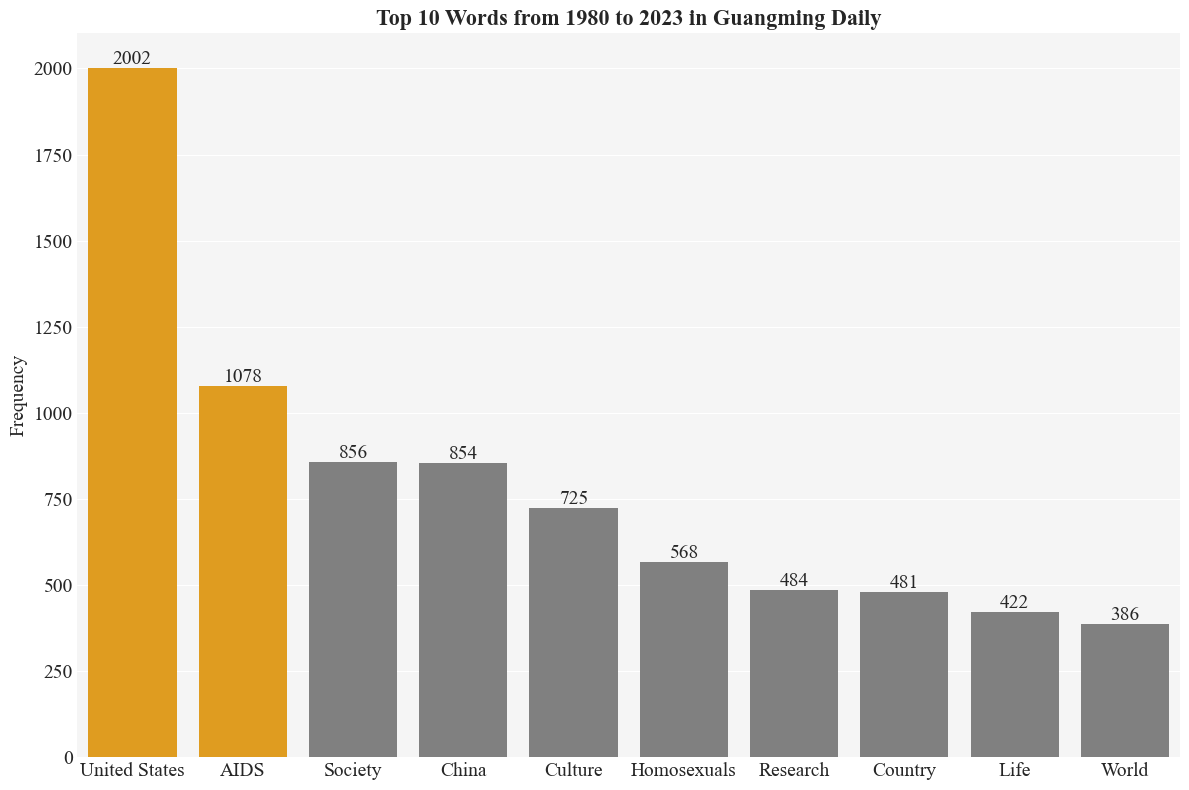

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['orange', 'orange', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
sns.barplot(x=gm_words_english[:10], y=gm_top_freqs[:10], palette=colors)
ax.set_facecolor('whitesmoke') 

plt.rcParams['font.family'] = 'Times New Roman'

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

      
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14) #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14) #set y-label
plt.yticks(fontsize=14) #set font and size of year on x-axis

plt.title("Top 10 Words from 1980 to 2023 in Guangming Daily",size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [129]:
# cut the words using jieba
pd_words =jieba.cut(peoples_daily_text)
# save all the words to a word list
pd_word_list = []
for pd_word in pd_words:
    pd_word_list.append(pd_word)
# use Baidu's stopwords
stopwords = [line.strip() for line in open('/Users/jinyang/Documents/Data/stopwords-master/baidu_stopwords.txt', 'r', encoding='UTF-8').readlines()]
# count words
pd_wordcounts = {}
pd_total_wc = 0
for pd_word in pd_word_list:
    if len(pd_word) == 1:
        continue
    if pd_word in stopwords:
        continue
    if pd_word.isnumeric():
        continue
    if pd_word in ['新华社','报道','...','本报','记者','一种','本报记者','日电','日前','一个','图为']:
        continue
    else:
        pd_wordcounts[pd_word]=pd_wordcounts.get(pd_word, 0) + 1
        pd_total_wc = pd_total_wc + 1
# printing the top 20 words and their frequencies
pd_top_words_freqs = sorted(pd_wordcounts.items(), key=lambda x: x[1], reverse=True)[:20]
pd_top_words = [x[0] for x in pd_top_words_freqs]
pd_top_freqs = [x[1] for x in pd_top_words_freqs]
# Calculate the percentage of each top 20 word frequency relative to the total word count
pd_top_percents = [(freq / pd_total_wc) * 1000 for freq in pd_top_freqs]
print(pd_top_words, pd_top_percents)

['美国', '艾滋病', '社会', '中国', '国家', '网站', '文化', '警察', '儿童', '患者', '同性恋', '发现', '世界', '非洲', '工作', '生活', '发生', '发展', '报告', '政府'] [17.959570728096956, 11.286890554167824, 5.111481173096494, 5.042094550837265, 3.642797668609492, 3.1455268757516883, 3.0992691275788693, 2.8679803867147746, 2.7523360162827277, 2.729207142196318, 2.61356277176427, 2.509482838375428, 2.39383846794338, 2.39383846794338, 2.3591451568137662, 2.336016282727357, 2.2088074752521045, 2.150985290036081, 2.139420852992876, 2.070034230733648]


In [30]:
# translating the top 20 words to english
pd_words_english=['United States','AIDS','Society','China','Country','Website',
                  'Culture', 'Police','Children', 'Patient', 'Homosexuals',
                  'Discover','World','Africa','Work','Life', 'Happen', 
               'Development','Report', 'Government']

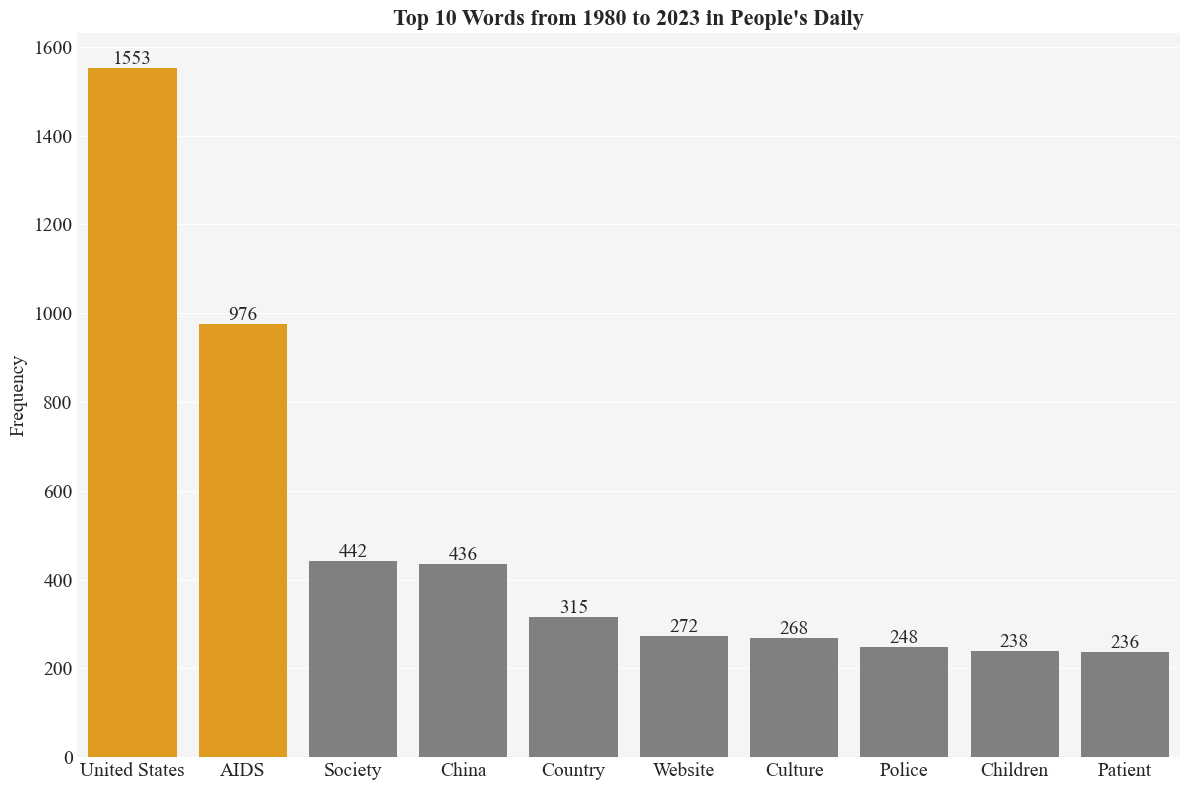

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['orange', 'orange', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
sns.barplot(x=pd_words_english[:10], y=pd_top_freqs[:10], palette=colors)
ax.set_facecolor('whitesmoke') 

plt.rcParams['font.family'] = 'Times New Roman'

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

      
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14) #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14) #set y-label
plt.yticks(fontsize=14) #set font and size of year on x-axis

plt.title("Top 10 Words from 1980 to 2023 in People's Daily",size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

### Changing Trends of AIDS and US

In [32]:
# Filter for only Guangming Daily articles
guangming_articles = combined_df[combined_df['Source'] == 'Guangming Daily']
guangming_articles

Title        Date  \
0                          略论法国“新浪潮”电影  1963-03-13   
1                       “自取灭亡的企业”（附图片）  1963-08-27   
2           《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序  1982-08-05   
3    无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严  1983-02-12   
4                         畸形社会畸形病（附图片）  1983-09-18   
..                                 ...         ...   
334                         弱首相难推“硬脱欧”  2017-06-13   
335                               纽约故事  2017-06-16   
336                    美国底层民众生活侧记（附图片）  2017-12-13   
337        规则面前　一视同仁\n美国学术打假“老虎苍蝇”都不放过  2018-02-05   
338            “花样美男”盛行，男子气概是否要拯救（附图片）  2018-07-25   

                                                  Body           Source  Year  \
0    一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个...  Guangming Daily  1963   
1    好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...  Guangming Daily  1963   
2    《红楼梦》研究该有一个突破了：普通读者早就这样盼望。 《红楼梦》研究的现状是怎样的呢？从哪里...  Guangming Daily  1982   
3    编辑部： 最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，并追究...  Guangming Daily  1983   
4    常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...  Guangming Daily  1983   
..                                                 ...              ...   ...   
334  在经历了一场自导自演的提前大选之后，英国首相特雷莎·梅领导的保守党不仅未能如愿巩固执政地位，...  Guangming Daily  2017   
335  压抑，是我合上白先勇的小说《纽约客》之后，脑中第一个蹦出来的词。我长久地注视着书封。 我一向...  Guangming Daily  2017   
336  美国纽约市曼哈顿中城11日发生爆炸，导致4人受伤。纽约市长德布拉西奥说，这是“一起未遂恐怖袭...  Guangming Daily  2017   
337  日本京都大学诱导多能干细胞（iPS细胞）研究所学术造假丑闻近日曝光后，舆论哗然。其实，学术造...  Guangming Daily  2018   
338  2010年，笔者去韩国首尔的梨花女子大学参加一个学术会议时，听到几位与会西方教授，颇不以为然...  Guangming Daily  2018   

     Entry Length  
0            4409  
1             184  
2            4369  
3            1017  
4            1280  
..            ...  
334          1775  
335          1563  
336          3432  
337          1774  
338          5456  

[339 rows x 6 columns]

In [33]:
# Group by 'Year' for Guangming Daily articles
gm_grouped_by_year = guangming_articles.groupby('Year')

In [34]:
import jieba

# Assuming gm_grouped_by_year and gm_top_words are already defined
# Initialize a dictionary to store the word counts for each year
gm_word_year_counts = {}
gm_total_wc_year = {}

# Iterate through top 20 word list
for word in gm_top_words:
    # Create a dictionary to hold the counts for each word in each year
    gm_word_counts = {}
    for year, group in gm_grouped_by_year:
        # Get the article text for this year
        gm_text_year = group['Body'].to_string()
        # Cut the words using jieba
        gm_words_year_list = list(jieba.cut(gm_text_year))  # Convert the generator to a list immediately
        # Count the total words for this year
        gm_total_wc_year[year] = len(gm_words_year_list)
        # Count the number of occurrences of the word in the year
        count = gm_words_year_list.count(word)
        # Add the count to the year's dictionary
        gm_word_counts[year] = count
    # Add the year's dictionary to the overall word_counts dictionary
    gm_word_year_counts[word] = gm_word_counts


In [35]:
gm_total_wc_year

{1963: 66,
 1982: 36,
 1983: 64,
 1985: 154,
 1986: 104,
 1987: 224,
 1988: 250,
 1989: 360,
 1990: 133,
 1991: 33,
 1992: 129,
 1993: 739,
 1994: 166,
 1995: 426,
 1996: 361,
 1997: 132,
 1998: 391,
 1999: 471,
 2000: 449,
 2001: 286,
 2002: 421,
 2003: 449,
 2004: 521,
 2005: 250,
 2006: 548,
 2007: 71,
 2008: 29,
 2009: 380,
 2010: 190,
 2011: 566,
 2012: 396,
 2013: 630,
 2014: 412,
 2015: 572,
 2016: 435,
 2017: 132,
 2018: 59}

In [36]:
total_gm_word_count = sum(gm_total_wc_year.values())
total_gm_word_count

11035

In [37]:
gm_word_year_counts

{'美国': {1963: 0,
  1982: 0,
  1983: 0,
  1985: 1,
  1986: 2,
  1987: 0,
  1988: 2,
  1989: 0,
  1990: 0,
  1991: 0,
  1992: 1,
  1993: 10,
  1994: 3,
  1995: 1,
  1996: 3,
  1997: 0,
  1998: 8,
  1999: 1,
  2000: 2,
  2001: 0,
  2002: 4,
  2003: 1,
  2004: 4,
  2005: 1,
  2006: 4,
  2007: 0,
  2008: 0,
  2009: 0,
  2010: 0,
  2011: 1,
  2012: 2,
  2013: 0,
  2014: 0,
  2015: 3,
  2016: 2,
  2017: 2,
  2018: 0},
 '艾滋病': {1963: 0,
  1982: 0,
  1983: 0,
  1985: 0,
  1986: 0,
  1987: 2,
  1988: 5,
  1989: 3,
  1990: 1,
  1991: 0,
  1992: 3,
  1993: 6,
  1994: 1,
  1995: 2,
  1996: 1,
  1997: 4,
  1998: 2,
  1999: 3,
  2000: 3,
  2001: 0,
  2002: 1,
  2003: 1,
  2004: 1,
  2005: 2,
  2006: 7,
  2007: 1,
  2008: 0,
  2009: 2,
  2010: 1,
  2011: 0,
  2012: 2,
  2013: 0,
  2014: 0,
  2015: 4,
  2016: 0,
  2017: 0,
  2018: 0},
 '社会': {1963: 0,
  1982: 0,
  1983: 1,
  1985: 0,
  1986: 0,
  1987: 1,
  1988: 1,
  1989: 1,
  1990: 1,
  1991: 0,
  1992: 0,
  1993: 1,
  1994: 0,
  1995: 0,
  1996: 0,

In [91]:
gm_df_word_counts = pd.DataFrame(gm_word_year_counts)
# Optionally, transpose the DataFrame if you prefer years as columns and words as rows
gm_df_word_counts = gm_df_word_counts.transpose()
gm_df_word_counts.head()

1963  1982  1983  1985  1986  1987  1988  1989  1990  1991  ...  2009  \
美国      0     0     0     1     2     0     2     0     0     0  ...     0   
艾滋病     0     0     0     0     0     2     5     3     1     0  ...     2   
社会      0     0     1     0     0     1     1     1     1     0  ...     0   
中国      0     0     0     0     0     0     2     0     0     0  ...     0   
文化      0     0     0     0     1     0     0     0     0     0  ...     0   

     2010  2011  2012  2013  2014  2015  2016  2017  2018  
美国      0     1     2     0     0     3     2     2     0  
艾滋病     1     0     2     0     0     4     0     0     0  
社会      0     1     0     0     2     0     0     0     0  
中国      0     0     3     0     4     1     0     0     0  
文化      1     1     0     0     1     0     0     0     0  

[5 rows x 37 columns]

In [92]:
# adding years have no articles
y1980 = pd.DataFrame({'1980':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '1981':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_counts.index)
y1984 = pd.DataFrame({'1984':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_counts.index)
y2019 = pd.DataFrame({'2019':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2020':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2021':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2022':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2023':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_counts.index)
gm_df_word_counts = pd.concat([gm_df_word_counts.iloc[:,:1],y1980, gm_df_word_counts.iloc[:,1:]], axis=1)
gm_df_word_counts = pd.concat([gm_df_word_counts.iloc[:,:5],y1984, gm_df_word_counts.iloc[:,5:]], axis=1)
gm_df_word_counts = pd.concat([gm_df_word_counts,y2019], axis=1)

gm_df_word_counts.head()

1963  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  2014  \
美国      0     0     0     0     0     0     1     2     0     2  ...     0   
艾滋病     0     0     0     0     0     0     0     0     2     5  ...     0   
社会      0     0     0     0     1     0     0     0     1     1  ...     2   
中国      0     0     0     0     0     0     0     0     0     2  ...     4   
文化      0     0     0     0     0     0     0     1     0     0  ...     1   

     2015  2016  2017  2018  2019  2020  2021  2022  2023  
美国      3     2     2     0     0     0     0     0     0  
艾滋病     4     0     0     0     0     0     0     0     0  
社会      0     0     0     0     0     0     0     0     0  
中国      1     0     0     0     0     0     0     0     0  
文化      0     0     0     0     0     0     0     0     0  

[5 rows x 45 columns]

In [93]:
gm_df_word_counts.index = gm_words_english
gm_df_word_counts.head()

1963  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
United States     0     0     0     0     0     0     1     2     0     2   
AIDS              0     0     0     0     0     0     0     0     2     5   
Society           0     0     0     0     1     0     0     0     1     1   
China             0     0     0     0     0     0     0     0     0     2   
Culture           0     0     0     0     0     0     0     1     0     0   

               ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
United States  ...     0     3     2     2     0     0     0     0     0     0  
AIDS           ...     0     4     0     0     0     0     0     0     0     0  
Society        ...     2     0     0     0     0     0     0     0     0     0  
China          ...     4     1     0     0     0     0     0     0     0     0  
Culture        ...     1     0     0     0     0     0     0     0     0     0  

[5 rows x 45 columns]

In [38]:
# Initialize a dictionary to hold the percentages for each word in each year
gm_word_year_percentages = {}

# Calculate the percentages
for word in gm_top_words:
    percentages = {}
    for year in gm_word_year_counts[word]:
        # Calculate the percentage of the word for the year
        word_count = gm_word_year_counts[word][year]
        total_count = gm_total_wc_year[year]
        percentage = (word_count / total_count) * 100
        percentages[year] = percentage
    gm_word_year_percentages[word] = percentages

# Convert the dictionary to a DataFrame for easier analysis and visualization
gm_df_word_percentages = pd.DataFrame(gm_word_year_percentages)

# Optionally, transpose the DataFrame if you prefer years as columns and words as rows
gm_df_word_percentages = gm_df_word_percentages.transpose()

# Fill NaN values with 0 if any year does not have a count for a word
gm_df_word_percentages.fillna(0, inplace=True)

# Display the DataFrame
gm_df_word_percentages.head()


1963  1982    1983      1985      1986      1987  1988      1989  \
美国    0.0   0.0  0.0000  0.649351  1.923077  0.000000   0.8  0.000000   
艾滋病   0.0   0.0  0.0000  0.000000  0.000000  0.892857   2.0  0.833333   
社会    0.0   0.0  1.5625  0.000000  0.000000  0.446429   0.4  0.277778   
中国    0.0   0.0  0.0000  0.000000  0.000000  0.000000   0.8  0.000000   
文化    0.0   0.0  0.0000  0.000000  0.961538  0.000000   0.0  0.000000   

        1990  1991  ...      2009      2010      2011      2012  2013  \
美国   0.00000   0.0  ...  0.000000  0.000000  0.176678  0.505051   0.0   
艾滋病  0.75188   0.0  ...  0.526316  0.526316  0.000000  0.505051   0.0   
社会   0.75188   0.0  ...  0.000000  0.000000  0.176678  0.000000   0.0   
中国   0.00000   0.0  ...  0.000000  0.000000  0.000000  0.757576   0.0   
文化   0.00000   0.0  ...  0.000000  0.526316  0.176678  0.000000   0.0   

         2014      2015     2016      2017  2018  
美国   0.000000  0.524476  0.45977  1.515152   0.0  
艾滋病  0.000000  0.699301  0.00000  0.000000   0.0  
社会   0.485437  0.000000  0.00000  0.000000   0.0  
中国   0.970874  0.174825  0.00000  0.000000   0.0  
文化   0.242718  0.000000  0.00000  0.000000   0.0  

[5 rows x 37 columns]

In [39]:
# adding years have no articles
w1980 = pd.DataFrame({'1980':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '1981':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_percentages.index)
w1984 = pd.DataFrame({'1984':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_percentages.index)
w2019 = pd.DataFrame({'2019':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2020':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2021':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2022':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=gm_df_word_percentages.index)
gm_df_word_percentages = pd.concat([gm_df_word_percentages.iloc[:,:1],w1980, gm_df_word_percentages.iloc[:,1:]], axis=1)
gm_df_word_percentages = pd.concat([gm_df_word_percentages.iloc[:,:5],w1984, gm_df_word_percentages.iloc[:,5:]], axis=1)
gm_df_word_percentages = pd.concat([gm_df_word_percentages,w2019], axis=1)

In [40]:
gm_df_word_percentages.head()

1963  1980  1981  1982    1983  1984      1985      1986      1987  1988  \
美国    0.0     0     0   0.0  0.0000     0  0.649351  1.923077  0.000000   0.8   
艾滋病   0.0     0     0   0.0  0.0000     0  0.000000  0.000000  0.892857   2.0   
社会    0.0     0     0   0.0  1.5625     0  0.000000  0.000000  0.446429   0.4   
中国    0.0     0     0   0.0  0.0000     0  0.000000  0.000000  0.000000   0.8   
文化    0.0     0     0   0.0  0.0000     0  0.000000  0.961538  0.000000   0.0   

     ...  2013      2014      2015     2016      2017  2018  2019  2020  2021  \
美国   ...   0.0  0.000000  0.524476  0.45977  1.515152   0.0     0     0     0   
艾滋病  ...   0.0  0.000000  0.699301  0.00000  0.000000   0.0     0     0     0   
社会   ...   0.0  0.485437  0.000000  0.00000  0.000000   0.0     0     0     0   
中国   ...   0.0  0.970874  0.174825  0.00000  0.000000   0.0     0     0     0   
文化   ...   0.0  0.242718  0.000000  0.00000  0.000000   0.0     0     0     0   

     2022  
美国      0  
艾滋病     0  
社会      0  
中国      0  
文化      0  

[5 rows x 44 columns]

In [41]:
# compute the two-year average for a smoothier line
gm_word_rolling_avg = gm_df_word_percentages.rolling(2, axis=1).mean()

In [42]:
# change the index words(top20 words) to english
gm_word_rolling_avg.index = gm_words_english
gm_word_rolling_avg.head()

1963  1980  1981  1982     1983     1984      1985      1986  \
United States   NaN   0.0   0.0   0.0  0.00000  0.00000  0.324675  1.286214   
AIDS            NaN   0.0   0.0   0.0  0.00000  0.00000  0.000000  0.000000   
Society         NaN   0.0   0.0   0.0  0.78125  0.78125  0.000000  0.000000   
China           NaN   0.0   0.0   0.0  0.00000  0.00000  0.000000  0.000000   
Culture         NaN   0.0   0.0   0.0  0.00000  0.00000  0.000000  0.480769   

                   1987      1988  ...      2013      2014      2015  \
United States  0.961538  0.400000  ...  0.252525  0.000000  0.262238   
AIDS           0.446429  1.446429  ...  0.252525  0.000000  0.349650   
Society        0.223214  0.423214  ...  0.000000  0.242718  0.242718   
China          0.000000  0.400000  ...  0.378788  0.485437  0.572849   
Culture        0.480769  0.000000  ...  0.000000  0.121359  0.121359   

                   2016      2017      2018  2019  2020  2021  2022  
United States  0.492123  0.987461  0.757576   0.0   0.0   0.0   0.0  
AIDS           0.349650  0.000000  0.000000   0.0   0.0   0.0   0.0  
Society        0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0  
China          0.087413  0.000000  0.000000   0.0   0.0   0.0   0.0  
Culture        0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0  

[5 rows x 44 columns]

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['cornflowerblue', 'orange']
# Using integer values directly from the DataFrame column labels for plotting
years = gm_df_word_counts.columns[1:].astype(int)  # Keeping years as integers

for i, word in enumerate(gm_df_word_counts.index[:2]):
    y_data = gm_df_word_counts.loc[word, gm_df_word_counts.columns[1:]].values
    sns.lineplot(x=years, y=y_data, label=word, ax=ax, color=colors[i])

ax.set_facecolor('whitesmoke')

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Adding vertical lines for specific years
ax.axvline(x=1990, color='black')
ax.axvline(x=2003, color='black')
ax.axvline(x=2013, color='black')

# Annotating specific years with leader names
for i, name in zip([1985, 1996, 2008, 2018], ['DENG', 'JIANG', 'HU', 'XI']):
    color = 'cornflowerblue' if i in [1985, 2008] else 'orange'
    ax.annotate(name, xy=(i, 4),
                xytext=(0, 0), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=18, family='cursive', color=color)

plt.xlabel('')  # No x-axis label needed as it's clear it represents years
plt.xticks(np.arange(1980, 2024, step=2), fontsize=14, family='cursive')

plt.ylabel('Frequency', fontsize=14, family='cursive')
plt.yticks(fontsize=14, family='cursive')

plt.title("Word frequencies of AIDS and United States from 1980 to 2023 in Guangming Daily", family='cursive', size=16, weight='bold')

# Customizing tick parameters
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', left=False, labelleft=True)

plt.tight_layout()

plt.show()


In [104]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['cornflowerblue', 'orange']
# Use integer locations for columns if the DataFrame is exactly as shown with years as column headers
# Ensure years are treated as strings if there's a type issue in seaborn or matplotlib handling:
years = gm_df_word_counts.columns[1:].astype(str)

for i, word in enumerate(gm_df_word_counts.index[:2]):
    y_data = gm_df_word_counts.loc[word, gm_df_word_counts.columns[1:]].values
    sns.lineplot(x=years, y=y_data, label=word, 
             ax=ax, color=colors[i])
ax.set_facecolor('whitesmoke') #set background as whitesmoke

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.axvline(x=1990, color='black')
ax.axvline(x=2003, color='black')
ax.axvline(x=2013, color='black')

for i, name in zip([1985, 1996, 2008, 2018],['DENG','JIANG', 'HU', 'XI']):
    if i==1985:
        color='cornflowerblue'
    elif i==1996:
        color='orange'
    elif i==2008:
        color='cornflowerblue'
    elif i==2018:
        color='orange'
    ax.annotate(name, xy=(i, 4),
        xytext=(0, 0), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18,family='cursive',color=color)
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(np.arange(1980, 2024, step=2),fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Word frequencies of AIDS and United States from 1980 to 2023 in Guangming Daily",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

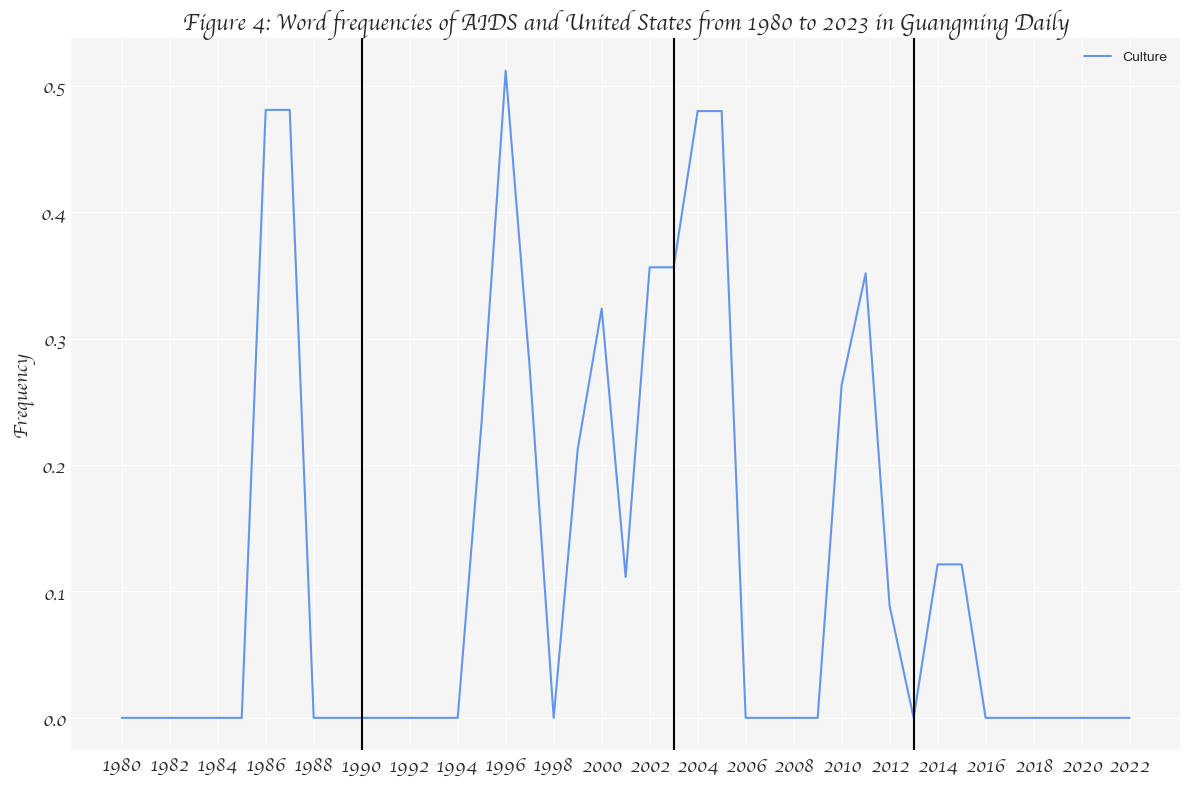

In [68]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['cornflowerblue', 'orange']
for i, word in enumerate(gm_word_rolling_avg.index[4:5]):
    sns.lineplot(x=gm_word_rolling_avg.columns, y=gm_word_rolling_avg.loc[word], label=word, 
             ax=ax, color=colors[i])
ax.set_facecolor('whitesmoke') #set background as whitesmoke

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.axvline(x=1990, color='black')
ax.axvline(x=2003, color='black')
ax.axvline(x=2013, color='black')

for i, name in zip([1985, 1996, 2008, 2018],['DENG','JIANG', 'HU', 'XI']):
    if i==1985:
        color='cornflowerblue'
    elif i==1996:
        color='orange'
    elif i==2008:
        color='cornflowerblue'
    elif i==2018:
        color='orange'
    ax.annotate(name, xy=(i, 4),
        xytext=(0, 0), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18,family='cursive',color=color)
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(np.arange(1980, 2023, step=2),fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Figure 4: Word frequencies of AIDS and United States from 1980 to 2023 in Guangming Daily",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [44]:
# Filter for only Guangming Daily articles
peoples_articles = combined_df[combined_df['Source'] == 'People\'s Daily']
# Group by 'Year' for Guangming Daily articles
pd_grouped_by_year = peoples_articles.groupby('Year')

In [45]:
peoples_articles

Title        Date  \
339             市长选举与美国式民主  1980-03-13   
340              美国保守主义的派别  1981-02-19   
341               《美国之旅》后记  1984-02-10   
342          西方的获得性免疫缺损综合症  1985-03-01   
343                  美国来的信  1985-03-20   
..                     ...         ...   
542        网络电影应纳入法律（聚焦审议）  2016-11-02   
543     全球接受艾滋病“救命疗法”的人数翻倍  2016-11-23   
544       美国主流媒体病症透析（人民观察）  2016-12-04   
545          2016年美国侵犯人权事记  2017-03-10   
546  慢性乙肝应长期治疗（健康之道·细说肝病②）  2018-06-01   

                                                  Body          Source  Year  \
339  本报记者 张彦 我们访问旧金山期间，正好赶上改选市长、督察员、检察官和行政司法官，报纸和电视...  People's Daily  1980   
340  里根总统和财政部长唐纳德·里甘（右二）等在办公室审查联邦开支。(人民数据库资料)里根总统的就...  People's Daily  1981   
341  １ 这是一本访问美国之后所得的诗篇。 １９８２年秋，我作为中国作家代表团的成员之一，到洛杉矶...  People's Daily  1984   
342  近年来，一种使人感到恐惧、厌恶、羞耻和神秘的病——获得性免疫缺损综合症，正日益广泛和迅速地在...  People's Daily  1985   
343  说老实话，小李，我个人认为，美国父母在这方面，实在对他们的子女太纵容了，给了他们太多的自由了...  People's Daily  1985   
..                                                 ...             ...   ...   
542  本报记者 王比学 10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法草...  People's Daily  2016   
543  据新华社日内瓦11月21日电  （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...  People's Daily  2016   
544  张天培 2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未及...  People's Daily  2016   
545  一月 4日  《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一所...  People's Daily  2017   
546  王 宇 对于成年人来讲，感染乙肝后大部分能自行恢复，发展为慢性乙肝的可能仅为5%左右。但新生...  People's Daily  2018   

     Entry Length  
339          1331  
340          1577  
341          2184  
342           948  
343          1670  
..            ...  
542           633  
543           253  
544          2947  
545         17423  
546          1378  

[208 rows x 6 columns]

In [46]:
# Assuming gm_grouped_by_year and gm_top_words are already defined
# Initialize a dictionary to store the word counts for each year
pd_word_year_counts = {}
pd_total_wc_year = {}

# Iterate through top 20 word list
for word in pd_top_words:
    # Create a dictionary to hold the counts for each word in each year
    pd_word_counts = {}
    for year, group in pd_grouped_by_year:
        # Get the article text for this year
        pd_text_year = group['Body'].to_string()
        # Cut the words using jieba
        pd_words_year_list = list(jieba.cut(pd_text_year))  # Convert the generator to a list immediately
        # Count the total words for this year
        pd_total_wc_year[year] = len(pd_words_year_list)
        # Count the number of occurrences of the word in the year
        count = pd_words_year_list.count(word)
        # Add the count to the year's dictionary
        pd_word_counts[year] = count
    # Add the year's dictionary to the overall word_counts dictionary
    pd_word_year_counts[word] = pd_word_counts


In [47]:
pd_total_wc_year
total_pd_word_count = sum(pd_total_wc_year.values())
total_pd_word_count

6868

In [48]:
pd_word_year_counts

{'美国': {1980: 0,
  1981: 0,
  1984: 1,
  1985: 2,
  1986: 1,
  1987: 2,
  1988: 1,
  1989: 4,
  1990: 2,
  1991: 3,
  1992: 3,
  1993: 1,
  1994: 0,
  1995: 2,
  1996: 3,
  1998: 1,
  1999: 2,
  2000: 7,
  2001: 0,
  2002: 0,
  2003: 1,
  2004: 3,
  2005: 0,
  2006: 1,
  2007: 0,
  2008: 0,
  2009: 1,
  2010: 4,
  2011: 2,
  2012: 0,
  2013: 1,
  2014: 1,
  2015: 2,
  2016: 8,
  2017: 0,
  2018: 0},
 '艾滋病': {1980: 0,
  1981: 0,
  1984: 0,
  1985: 0,
  1986: 0,
  1987: 5,
  1988: 4,
  1989: 6,
  1990: 3,
  1991: 3,
  1992: 2,
  1993: 2,
  1994: 0,
  1995: 1,
  1996: 0,
  1998: 2,
  1999: 0,
  2000: 4,
  2001: 2,
  2002: 0,
  2003: 3,
  2004: 6,
  2005: 0,
  2006: 1,
  2007: 5,
  2008: 2,
  2009: 4,
  2010: 1,
  2011: 2,
  2012: 0,
  2013: 0,
  2014: 3,
  2015: 1,
  2016: 1,
  2017: 0,
  2018: 0},
 '社会': {1980: 0,
  1981: 0,
  1984: 0,
  1985: 0,
  1986: 1,
  1987: 2,
  1988: 0,
  1989: 1,
  1990: 1,
  1991: 0,
  1992: 0,
  1993: 0,
  1994: 0,
  1995: 0,
  1996: 0,
  1998: 0,
  1999: 0,


In [49]:
# Initialize a dictionary to hold the percentages for each word in each year
pd_word_year_percentages = {}

# Calculate the percentages
for word in pd_top_words:
    percentages = {}
    for year in pd_word_year_counts[word]:
        # Calculate the percentage of the word for the year
        word_count = pd_word_year_counts[word][year]
        total_count = pd_total_wc_year[year]
        percentage = (word_count / total_count) * 100
        percentages[year] = percentage
    pd_word_year_percentages[word] = percentages

# Convert the dictionary to a DataFrame for easier analysis and visualization
pd_df_word_percentages = pd.DataFrame(pd_word_year_percentages)

# Optionally, transpose the DataFrame if you prefer years as columns and words as rows
pd_df_word_percentages = pd_df_word_percentages.transpose()

# Fill NaN values with 0 if any year does not have a count for a word
pd_df_word_percentages.fillna(0, inplace=True)

# Display the DataFrame
pd_df_word_percentages.head()

1980  1981      1984      1985      1986      1987      1988      1989  \
美国    0.0   0.0  2.857143  0.668896  0.497512  0.754717  0.378788  0.847458   
艾滋病   0.0   0.0  0.000000  0.000000  0.000000  1.886792  1.515152  1.271186   
社会    0.0   0.0  0.000000  0.000000  0.497512  0.754717  0.000000  0.211864   
中国    0.0   0.0  2.857143  0.000000  0.000000  0.000000  0.000000  0.211864   
国家    0.0   0.0  0.000000  0.000000  0.000000  0.377358  0.000000  0.000000   

         1990      1991  ...      2009      2010      2011  2012      2013  \
美国   1.010101  1.657459  ...  0.377358  1.230769  0.724638   0.0  0.480769   
艾滋病  1.515152  1.657459  ...  1.509434  0.307692  0.724638   0.0  0.000000   
社会   0.505051  0.000000  ...  0.377358  0.000000  0.000000   0.0  0.000000   
中国   0.000000  0.000000  ...  0.377358  0.000000  0.362319   0.0  0.000000   
国家   0.505051  0.552486  ...  0.000000  0.000000  0.000000   0.0  0.000000   

         2014      2015      2016  2017  2018  
美国   0.689655  1.459854  2.492212   0.0   0.0  
艾滋病  2.068966  0.729927  0.311526   0.0   0.0  
社会   0.689655  0.000000  0.000000   0.0   0.0  
中国   0.000000  0.000000  0.000000   0.0   0.0  
国家   0.000000  0.000000  0.311526   0.0   0.0  

[5 rows x 36 columns]

In [50]:
# adding years have no articles
w1982 = pd.DataFrame({'1982':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '1983':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=pd_df_word_percentages.index)
w1997 = pd.DataFrame({'1997':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}, index=pd_df_word_percentages.index)
w2019 = pd.DataFrame({'2019':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2020':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2021':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      '2022':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]},index=pd_df_word_percentages.index)
pd_df_word_percentages = pd.concat([pd_df_word_percentages.iloc[:,:2], w1982, pd_df_word_percentages.iloc[:,2:]], axis=1)
pd_df_word_percentages = pd.concat([pd_df_word_percentages.iloc[:,:17], w1997, pd_df_word_percentages.iloc[:,17:]], axis=1)
pd_df_word_percentages = pd.concat([pd_df_word_percentages,w2019], axis=1)

In [51]:
pd_df_word_percentages.head()

1980  1981  1982  1983      1984      1985      1986      1987      1988  \
美国    0.0   0.0     0     0  2.857143  0.668896  0.497512  0.754717  0.378788   
艾滋病   0.0   0.0     0     0  0.000000  0.000000  0.000000  1.886792  1.515152   
社会    0.0   0.0     0     0  0.000000  0.000000  0.497512  0.754717  0.000000   
中国    0.0   0.0     0     0  2.857143  0.000000  0.000000  0.000000  0.000000   
国家    0.0   0.0     0     0  0.000000  0.000000  0.000000  0.377358  0.000000   

         1989  ...      2013      2014      2015      2016  2017  2018  2019  \
美国   0.847458  ...  0.480769  0.689655  1.459854  2.492212   0.0   0.0     0   
艾滋病  1.271186  ...  0.000000  2.068966  0.729927  0.311526   0.0   0.0     0   
社会   0.211864  ...  0.000000  0.689655  0.000000  0.000000   0.0   0.0     0   
中国   0.211864  ...  0.000000  0.000000  0.000000  0.000000   0.0   0.0     0   
国家   0.000000  ...  0.000000  0.000000  0.000000  0.311526   0.0   0.0     0   

     2020  2021  2022  
美国      0     0     0  
艾滋病     0     0     0  
社会      0     0     0  
中国      0     0     0  
国家      0     0     0  

[5 rows x 43 columns]

In [52]:
# compute the two-year average for a smoothier line
pd_word_rolling_avg = pd_df_word_percentages.rolling(2, axis=1).mean()
# change the index words(top20 words) to english
pd_word_rolling_avg.index = pd_words_english
pd_word_rolling_avg.head()

1980  1981  1982  1983      1984      1985      1986      1987  \
United States   NaN   0.0   0.0   0.0  1.428571  1.763020  0.583204  0.626115   
AIDS            NaN   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.943396   
Society         NaN   0.0   0.0   0.0  0.000000  0.000000  0.248756  0.626115   
China           NaN   0.0   0.0   0.0  1.428571  1.428571  0.000000  0.000000   
Country         NaN   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.188679   

                   1988      1989  ...          2013      2014      2015  \
United States  0.566752  0.613123  ...  2.403846e-01  0.585212  1.074755   
AIDS           1.700972  1.393169  ...  2.220446e-16  1.034483  1.399446   
Society        0.377358  0.105932  ...  0.000000e+00  0.344828  0.344828   
China          0.000000  0.105932  ...  0.000000e+00  0.000000  0.000000   
Country        0.188679  0.000000  ...  0.000000e+00  0.000000  0.000000   

                   2016      2017          2018          2019          2020  \
United States  1.976033  1.246106  2.220446e-16  2.220446e-16  2.220446e-16   
AIDS           0.520727  0.155763  2.220446e-16  2.220446e-16  2.220446e-16   
Society        0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
China          0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
Country        0.155763  0.155763  0.000000e+00  0.000000e+00  0.000000e+00   

                       2021          2022  
United States  2.220446e-16  2.220446e-16  
AIDS           2.220446e-16  2.220446e-16  
Society        0.000000e+00  0.000000e+00  
China          0.000000e+00  0.000000e+00  
Country        0.000000e+00  0.000000e+00  

[5 rows x 43 columns]

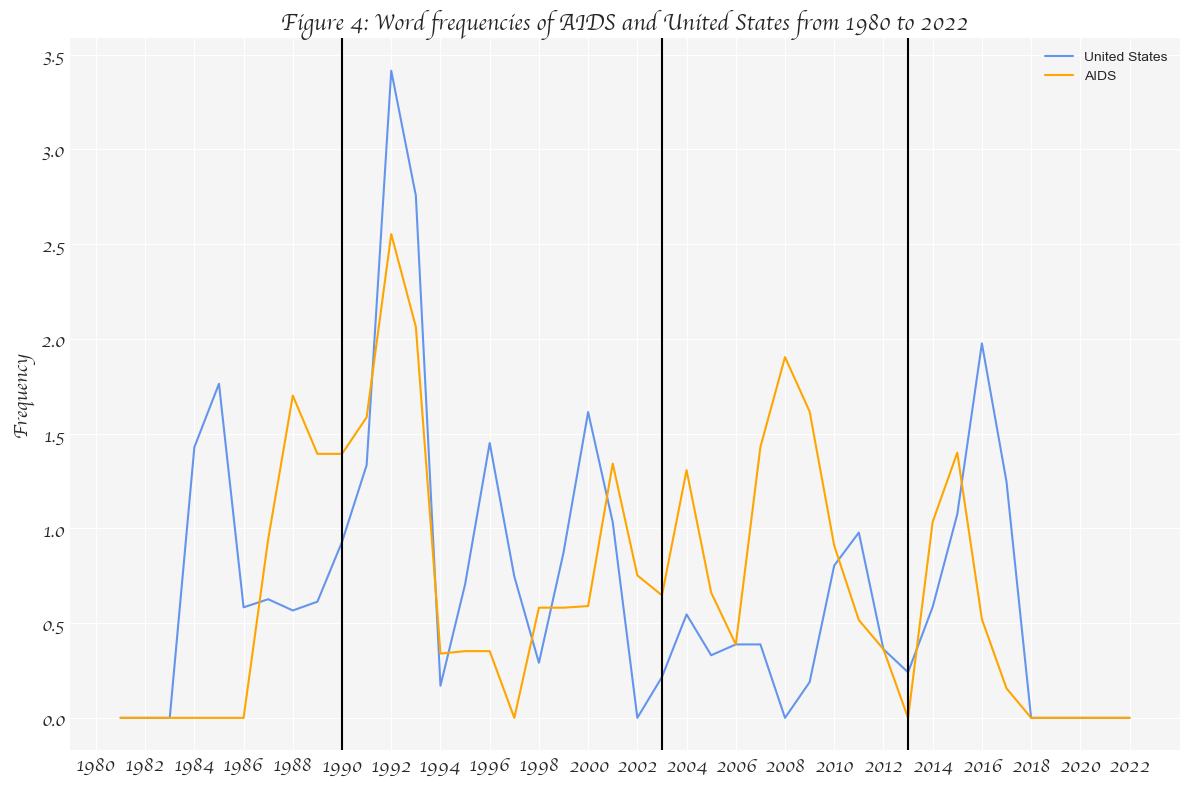

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['cornflowerblue', 'orange']
for i, word in enumerate(pd_word_rolling_avg.index[:2]):
    sns.lineplot(x=pd_word_rolling_avg.columns, y=pd_word_rolling_avg.loc[word], label=word, 
             ax=ax, color=colors[i])
ax.set_facecolor('whitesmoke') #set background as whitesmoke

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.axvline(x=1990, color='black')
ax.axvline(x=2003, color='black')
ax.axvline(x=2013, color='black')

for i, name in zip([1985, 1996, 2008, 2018],['DENG','JIANG', 'HU', 'XI']):
    if i==1985:
        color='cornflowerblue'
    elif i==1996:
        color='orange'
    elif i==2008:
        color='cornflowerblue'
    elif i==2018:
        color='orange'
    ax.annotate(name, xy=(i, 4),
        xytext=(0, 0), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18,family='cursive',color=color)
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(np.arange(1980, 2023, step=2),fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Figure 4: Word frequencies of AIDS and United States from 1980 to 2022",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

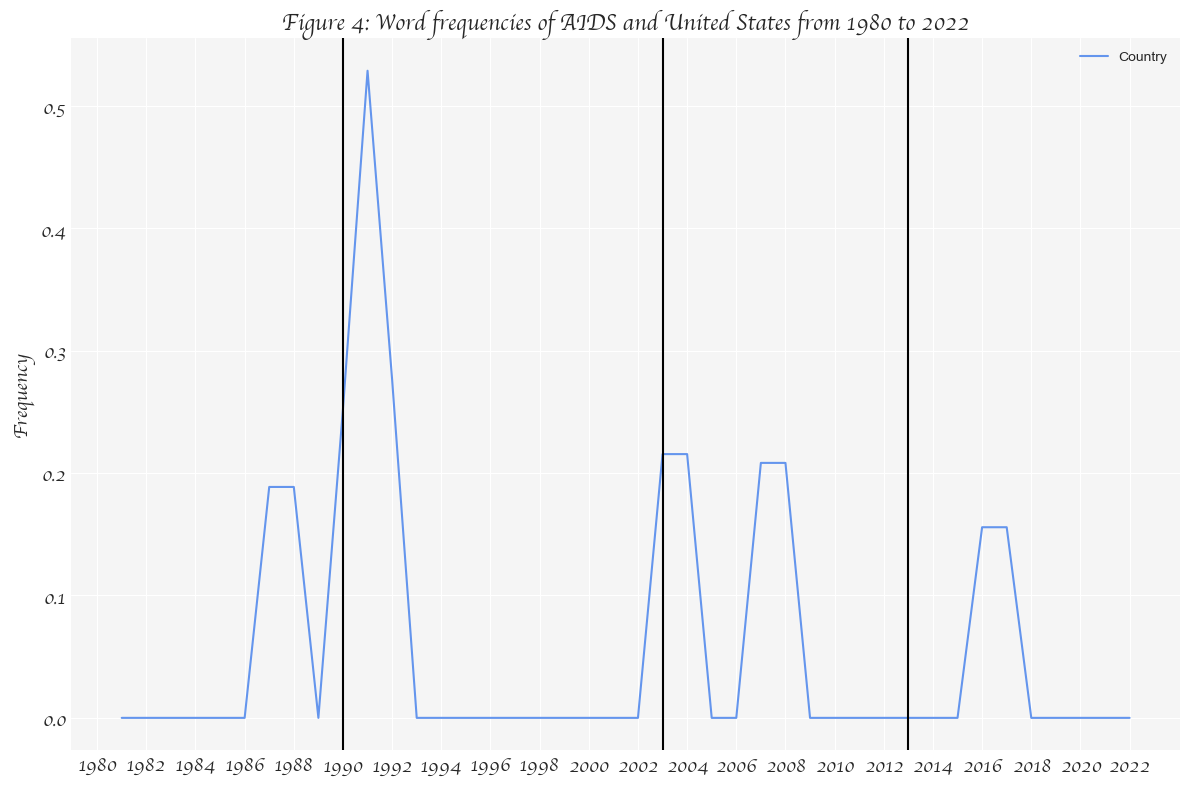

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

colors = ['cornflowerblue', 'orange']
for i, word in enumerate(pd_word_rolling_avg.index[4:5]):
    sns.lineplot(x=pd_word_rolling_avg.columns, y=pd_word_rolling_avg.loc[word], label=word, 
             ax=ax, color=colors[i])
ax.set_facecolor('whitesmoke') #set background as whitesmoke

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.axvline(x=1990, color='black')
ax.axvline(x=2003, color='black')
ax.axvline(x=2013, color='black')

for i, name in zip([1985, 1996, 2008, 2018],['DENG','JIANG', 'HU', 'XI']):
    if i==1985:
        color='cornflowerblue'
    elif i==1996:
        color='orange'
    elif i==2008:
        color='cornflowerblue'
    elif i==2018:
        color='orange'
    ax.annotate(name, xy=(i, 4),
        xytext=(0, 0), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18,family='cursive',color=color)
        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(np.arange(1980, 2023, step=2),fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.title("Figure 4: Word frequencies of AIDS and United States from 1980 to 2022",family='cursive', size= 16, weight='bold')

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

In [54]:
selected_words = ['United States', 'AIDS']
gm_word_rolling_avg_2 = gm_word_rolling_avg.transpose()[selected_words]
pd_word_rolling_avg_2 = pd_word_rolling_avg.transpose()[selected_words]
gm_word_rolling_avg_2.head()

United States  AIDS
1963            NaN   NaN
1980            0.0   0.0
1981            0.0   0.0
1982            0.0   0.0
1983            0.0   0.0

In [70]:
selected_words = ['Culture']
gm_word_rolling_avg_2 = gm_word_rolling_avg.transpose()[selected_words]
pd_word_rolling_avg_2 = pd_word_rolling_avg.transpose()[selected_words]
gm_word_rolling_avg_2.head()

Culture
1963      NaN
1980      0.0
1981      0.0
1982      0.0
1983      0.0

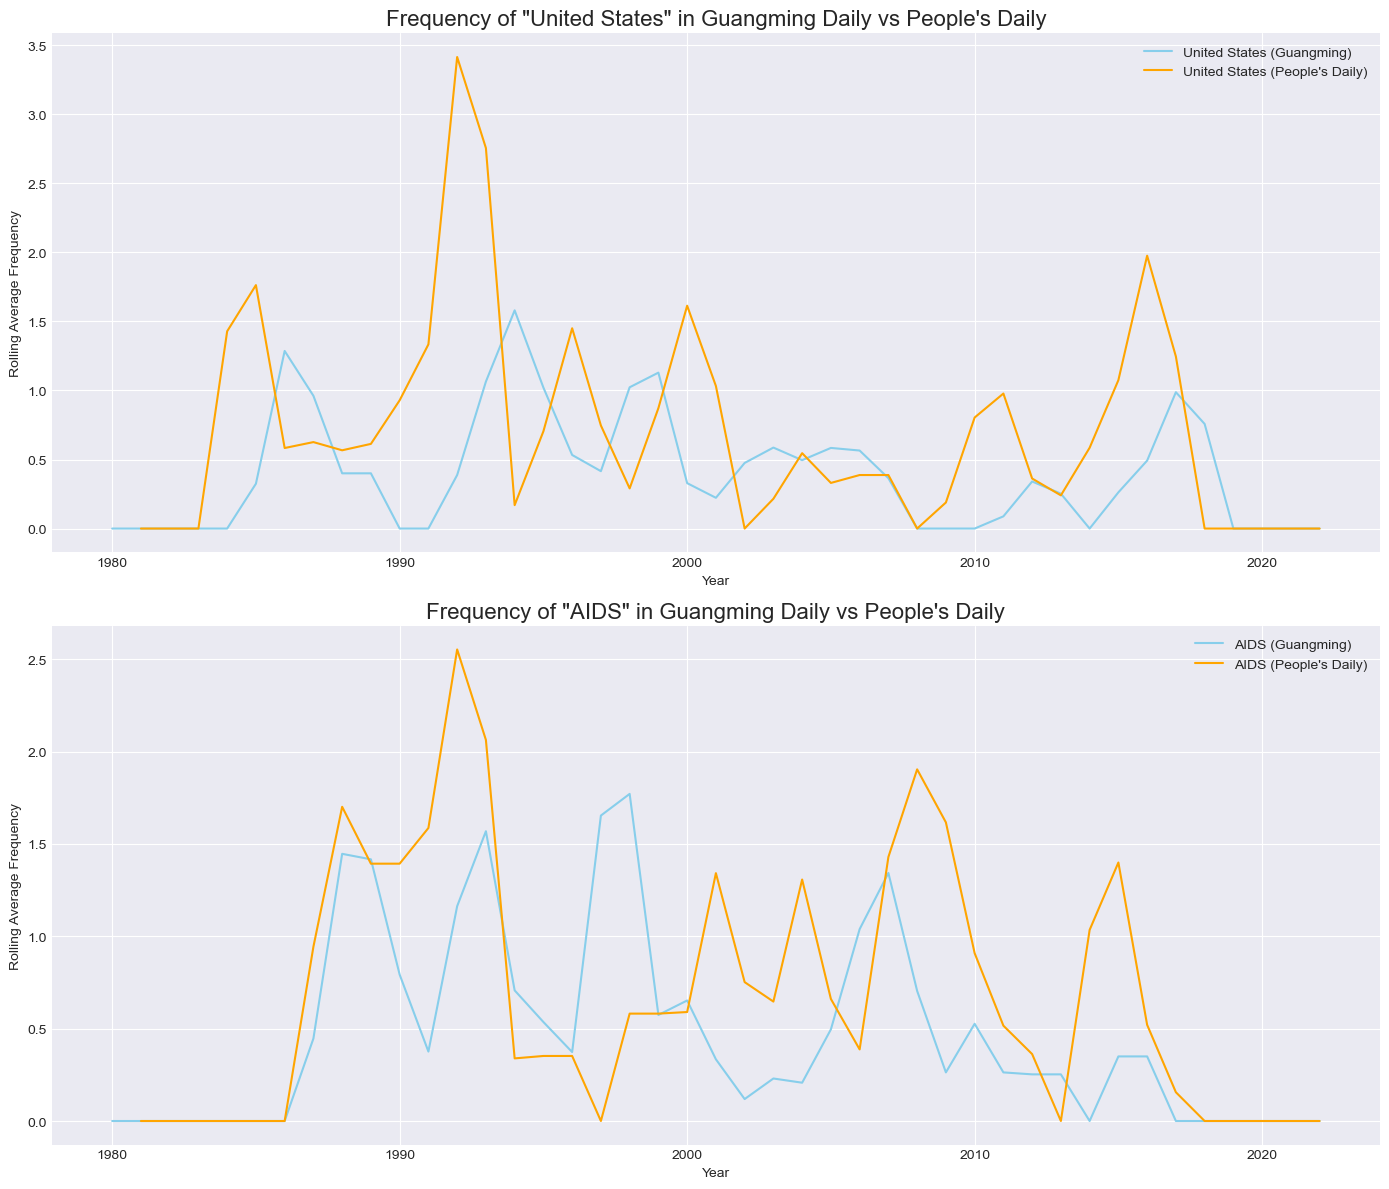

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Correcting the mock data structure and reattempting the plot

years = np.arange(1980, 2023)


fig, axs = plt.subplots(2, 1, figsize=(14, 12))

for i, word in enumerate(selected_words):
    sns.lineplot(ax=axs[i], data=gm_word_rolling_avg_2[word], label=f'{word} (Guangming)', color='skyblue')
    sns.lineplot(ax=axs[i], data=pd_word_rolling_avg_2[word], label=f'{word} (People\'s Daily)', color='orange')
    axs[i].set_title(f'Frequency of "{word}" in Guangming Daily vs People\'s Daily', fontsize=16)
    axs[i].set_ylabel('Rolling Average Frequency')
    axs[i].set_xlabel('Year')
    axs[i].legend()

plt.tight_layout()
plt.show()


## Topic Modeling

In [56]:
# import countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
# define a fiction tokenizing words
def tokenize_zh(text):
    words = jieba.cut(text)
    word_list = []
    for word in words:
        word_list.append(word)
    word_clean =[]
    for word in word_list:
        if len(word) == 1:
            continue
        if word in stopwords:
            continue
        if word.isnumeric():
            continue
        else:
            word_clean.append(word)
    return word_clean

In [58]:
all_text=[row['Body'] for index, row in combined_df.iterrows()]
all_text

['一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个问题的时候，又往往牵涉到法国“新浪潮”电影。“新浪潮”是一阵世纪末的风，在西方资本主义世界吹荡，对西方国家的电影发生了相当大的影响；它的出现在本世纪的五十年代，不是偶然的，它是现代资产阶级反动腐朽文艺思想在电影领域内的表现，是带着鲜明的时代特征的。 法国“新浪潮”电影产生于1959年。那时候，戴高乐掌握了法国的政权，正在加紧对阿尔及利亚的侵略战争，庞大的军事开支，压在人民的肩膀上，物价高涨，社会动荡不安，国内的阶级矛盾尖锐化了。同时，美帝国主义日益疯狂地扩军备战，不断发出热核战争的恫吓，西方世界充满着战争的歇斯特里。法国资产阶级和小资产阶级知识分子，面对这样的局面，感到苦闷，彷徨，找不到出路。在这动荡的社会基础上，一片思想混乱和逃避现实的文学流派“新小说派”产生了。电影方面，“新浪潮”这样的流派也早已出现了。 当然，“新浪潮”的出现，还有法国电影界本身的原因。1955年起，法国电影创作停滞不前，电影市场充斥着平庸的作品，不受观众欢迎；许多老导演又被认为“保守”，不敢创新。一些青年电影工作者，由于得不到电影制片厂老板的重视，就开始自己集资拍摄影片，并提出“打破一切陈规旧套”，“表现自己思想”的口号。这样，到了1959年一种被叫做“新浪潮”的电影开始出现在银幕上。 “新浪潮”影片在表现形式上排除了大场面，降低摄制成本；导演多利用现场和外景，有的还保留了记录电影的特点；他们注意画面结构、细节安排和音响效果。“新浪潮”影片《广岛之恋》《四百下》《表兄弟》《黑琴师》等，在西方几个国家的电影节上获奖，更加引起人们的注意了。“新浪潮”导演阿仑·雷乃、弗朗索瓦·特吕弗、克劳特·夏勃罗等，也开始被人们广泛谈论起来。 超现实主义的借尸还魂 法国“新浪潮”电影“新”在哪里？“新浪潮”电影特征是什么？我觉得，仅从形式上看是不能得出应有的结论来的，必须从形式上的特点和内容的思想倾向的联系进行分析，才能比较清楚地看出“新浪潮”电影同其他电影的区别。“新浪潮”的许多主将都是理论家，所以不难从他们的理论中找到“新浪潮”的艺术观点。例如，“新浪潮”主要理论家之一马赛尔·马尔丹，就曾经援引意大利电影导演米开朗基罗·安东尼奥的艺术经验，说明“新浪潮”影片“既没有传统的开头，也没有结尾。影片所反映的是一个生活片

In [162]:
# Vectorize the text using CountVectorizer
print("Extracting tf features in review text for LDA...")
tf_vectorizer = CountVectorizer(tokenizer=tokenize_zh, 
                                stop_words=stopwords,
                                max_df=0.7, min_df=7,
                                max_features = None)

tf_fit= tf_vectorizer.fit_transform(all_text)

Extracting tf features in review text for LDA...


In [163]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 3
n_top_words = 20

print("Fitting LDA models with tf_review features, "
      "n_samples=%d and n_topics=%d..."
      % (len(combined_df), n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(combined_df),
                                random_state=0)
#fit the model
lda.fit(tf_fit)

Fitting LDA models with tf_review features, n_samples=547 and n_topics=3...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=3, random_state=0,
                          total_samples=547)

In [64]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 4
n_top_words = 20

print("Fitting LDA models with tf_review features, "
      "n_samples=%d and n_topics=%d..."
      % (len(combined_df), n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(combined_df),
                                random_state=0)
#fit the model
lda.fit(tf_fit)

Fitting LDA models with tf_review features, n_samples=547 and n_topics=4...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=4, random_state=0,
                          total_samples=547)

In [61]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
n_top_words = 20

print("Fitting LDA models with tf_review features, "
      "n_samples=%d and n_topics=%d..."
      % (len(combined_df), n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(combined_df),
                                random_state=0)
#fit the model
lda.fit(tf_fit)

Fitting LDA models with tf_review features, n_samples=547 and n_topics=5...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=5, random_state=0,
                          total_samples=547)

In [62]:
# print out the representative words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [63]:
print("\nTopics in all text with LDA model:")
tf_feature_names= tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in all text with LDA model:

Topic #0:
女权主义 网球 网友 莱斯 尴尬 企鹅 著作权 动物园 理论 原告 差异 浪潮 聊天室 有限公司 见面 批评家 恋人 吉斯 话语 公开赛

Topic #1:
布莱尔 大臣 工党 内阁 戴维斯 威尔士 事务 辞职 本人 伦敦 断袖 丑闻 成员 曼德尔 库克 内阁大臣 长安 搭讪 本病 散步

Topic #2:
最佳 导演 两岸 白血病 喜宴 台湾 电影 影片 台北 两只 爱滋病患 香魂女 奖项 医学家 李安 大陆 鸟笼 海峡两岸 同仁 执导

Topic #3:
性病 梅毒 墨索里尼 哲学 淋病 治疗 感染 发生 皮包 意大利 大辞典 脏话 普尔 法西斯 留学 尿道 症状 尖锐湿疣 皮肤 淋菌

Topic #4:
美国 艾滋病 一个 社会 中国 报道 文化 网站 警察 国家 同性恋 非洲 研究 生活 世界 儿童 发现 发生 华盛顿邮报 一种



In [65]:
print("\nTopics in all text with LDA model:")
tf_feature_names= tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in all text with LDA model:

Topic #0:
莱斯 网友 尴尬 著作权 企鹅 网络 原告 有限公司 动物园 审理 两只 聊天室 见面 吉斯 恋人 因特网 知多少 演艺圈 纠纷案 浪漫

Topic #1:
出版物 查韦斯 内容 淫秽 色情 布莱尔 市场 伦敦 工党 扫黄打非 非法 出版 描写 部门 大臣 违规 口袋书 图书 少儿 检查

Topic #2:
艾滋病 社会 一个 中国 文化 同性恋 美国 研究 国家 一种 生活 发展 发现 世界 患者 历史 电影 西方 感染 媒体

Topic #3:
美国 报道 网站 警察 非洲 华盛顿邮报 儿童 人权 报告 白人 总统 射杀 一个 男子 显示 发生 妇女 国家 黑人 监狱



In [164]:
print("\nTopics in all text with LDA model:")
tf_feature_names= tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in all text with LDA model:

Topic #0:
电影 文化 一个 香港 影片 生活 内容 作品 故事 教育 中国 艺术 社会 市场 一种 表现 出版物 部门 观众 出版

Topic #1:
艾滋病 患者 感染 发现 病毒 传播 人群 治疗 防治 感染者 预防 性病 社会 美国 男性 国家 检测 爱滋病 同性恋者 研究

Topic #2:
美国 报道 一个 社会 中国 网站 警察 文化 非洲 国家 华盛顿邮报 儿童 研究 政治 英国 历史 人权 世界 家庭 政府



### Topic Distribution Across Articles

In [134]:
topic_dist = lda.transform(tf_fit)
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(combined_df)
df_w_topics

0         1         2                              Title  \
0    0.236621  0.000524  0.762855                        略论法国“新浪潮”电影   
1    0.169837  0.171876  0.658287                     “自取灭亡的企业”（附图片）   
2    0.996902  0.000581  0.002517         《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序   
3    0.375554  0.002593  0.621854  无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严   
4    0.256208  0.656103  0.087689                       畸形社会畸形病（附图片）   
..        ...       ...       ...                                ...   
542  0.002771  0.002976  0.994252                    网络电影应纳入法律（聚焦审议）   
543  0.006436  0.987537  0.006028                 全球接受艾滋病“救命疗法”的人数翻倍   
544  0.000581  0.000515  0.998904                   美国主流媒体病症透析（人民观察）   
545  0.999786  0.000109  0.000105                      2016年美国侵犯人权事记   
546  0.001514  0.996993  0.001493              慢性乙肝应长期治疗（健康之道·细说肝病②）   

           Date                                               Body  \
0    1963-03-13  一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个...   
1    1963-08-27  好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...   
2    1982-08-05  《红楼梦》研究该有一个突破了：普通读者早就这样盼望。 《红楼梦》研究的现状是怎样的呢？从哪里...   
3    1983-02-12  编辑部： 最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，并追究...   
4    1983-09-18  常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...   
..          ...                                                ...   
542  2016-11-02  本报记者 王比学 10月31日，十二届全国人大常委会第二十四次会议分组审议了电影产业促进法草...   
543  2016-11-23  据新华社日内瓦11月21日电  （记者张淼）联合国艾滋病规划署21日发布报告说，截至2016...   
544  2016-12-04  张天培 2016年美国总统大选的结果出现与媒体预测相反的“逆转”，恐怕是美国主流媒体始料未及...   
545  2017-03-10  一月 4日  《华盛顿邮报》网站报道，27岁的非洲裔男子埃里克·约翰·塞内加尔在拉格里的一所...   
546  2018-06-01  王 宇 对于成年人来讲，感染乙肝后大部分能自行恢复，发展为慢性乙肝的可能仅为5%左右。但新生...   

              Source  Year  Entry Length  
0    Guangming Daily  1963          4409  
1    Guangming Daily  1963           184  
2    Guangming Daily  1982          4369  
3    Guangming Daily  1983          1017  
4    Guangming Daily  1983          1280  
..               ...   ...           ...  
542   People's Daily  2016           633  
543   People's Daily  2016           253  
544   People's Daily  2016          2947  
545   People's Daily  2017         17423  
546   People's Daily  2018          1378  

[547 rows x 9 columns]

### 3. Words aligned with each topic

In [135]:
import pandas as pd
import jieba

# Assuming gm_top_words is defined and your dataframe is named df

# Initialize a dictionary to store the word counts by article
total_wc_article = {}

# Iterate through each article
for index, row in combined_df.iterrows():
    # Get the article text
    text_article = row['Body']
    # Cut the words using jieba
    words_article_list = list(jieba.cut(text_article))  # Convert the generator to a list immediately
    # Count the total words for this article
    total_wc_article[index] = len(words_article_list)

# gm_article_word_counts now contains the count of each top word for each article
# gm_total_wc_article contains the total word count for each article
total_wc_article

{0: 2669,
 1: 112,
 2: 2720,
 3: 585,
 4: 723,
 5: 357,
 6: 429,
 7: 93,
 8: 1027,
 9: 285,
 10: 445,
 11: 362,
 12: 1314,
 13: 287,
 14: 675,
 15: 75,
 16: 339,
 17: 223,
 18: 787,
 19: 319,
 20: 769,
 21: 599,
 22: 1478,
 23: 662,
 24: 180,
 25: 1391,
 26: 893,
 27: 1322,
 28: 479,
 29: 725,
 30: 1161,
 31: 927,
 32: 170,
 33: 4267,
 34: 663,
 35: 627,
 36: 806,
 37: 567,
 38: 802,
 39: 504,
 40: 235,
 41: 855,
 42: 269,
 43: 312,
 44: 2838,
 45: 831,
 46: 608,
 47: 297,
 48: 747,
 49: 627,
 50: 424,
 51: 363,
 52: 499,
 53: 734,
 54: 308,
 55: 530,
 56: 762,
 57: 245,
 58: 599,
 59: 1070,
 60: 631,
 61: 495,
 62: 801,
 63: 800,
 64: 584,
 65: 711,
 66: 638,
 67: 115,
 68: 248,
 69: 625,
 70: 856,
 71: 2675,
 72: 1114,
 73: 754,
 74: 95,
 75: 933,
 76: 536,
 77: 693,
 78: 1801,
 79: 138,
 80: 708,
 81: 884,
 82: 481,
 83: 633,
 84: 1229,
 85: 1003,
 86: 806,
 87: 323,
 88: 1472,
 89: 3062,
 90: 562,
 91: 5646,
 92: 1951,
 93: 1066,
 94: 722,
 95: 517,
 96: 195,
 97: 864,
 98: 583,
 9

In [136]:
df_w_topics['word_count'] = df_w_topics.index.map(total_wc_article)

In [137]:
df_w_topics.head()

0         1         2                              Title  \
0  0.236621  0.000524  0.762855                        略论法国“新浪潮”电影   
1  0.169837  0.171876  0.658287                     “自取灭亡的企业”（附图片）   
2  0.996902  0.000581  0.002517         《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序   
3  0.375554  0.002593  0.621854  无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严   
4  0.256208  0.656103  0.087689                       畸形社会畸形病（附图片）   

         Date                                               Body  \
0  1963-03-13  一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个...   
1  1963-08-27  好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...   
2  1982-08-05  《红楼梦》研究该有一个突破了：普通读者早就这样盼望。 《红楼梦》研究的现状是怎样的呢？从哪里...   
3  1983-02-12  编辑部： 最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，并追究...   
4  1983-09-18  常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...   

            Source  Year  Entry Length  word_count  
0  Guangming Daily  1963          4409        2669  
1  Guangming Daily  1963           184         112  
2  Guangming Daily  1982          4369        2720  
3  Guangming Daily  1983          1017         585  
4  Guangming Daily  1983          1280         723

In [138]:
#create a for loop to get the weight for every topic
topic_columns = range(0, n_topics)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics.head()

0         1         2                              Title  \
0  0.236621  0.000524  0.762855                        略论法国“新浪潮”电影   
1  0.169837  0.171876  0.658287                     “自取灭亡的企业”（附图片）   
2  0.996902  0.000581  0.002517         《红楼梦》研究该有一个突破——白盾作《红楼梦新评》序   
3  0.375554  0.002593  0.621854  无端遭到恶毒诽谤　个别人竟肆意散播 电影演员达式常要求保护人格尊严   
4  0.256208  0.656103  0.087689                       畸形社会畸形病（附图片）   

         Date                                               Body  \
0  1963-03-13  一阵世纪末的风在西方吹荡 近年来，外国电影评论家们对电影艺术“革新”问题谈论得很多，谈论这个...   
1  1963-08-27  好莱坞正在濒于死亡！几年来，制片大减，失业剧增，不仅国外抵制美片愈来愈多，连国内市场也大为萎...   
2  1982-08-05  《红楼梦》研究该有一个突破了：普通读者早就这样盼望。 《红楼梦》研究的现状是怎样的呢？从哪里...   
3  1983-02-12  编辑部： 最近，著名电影演员达式常向记者诉说了他蒙受人身攻击的遭遇，要求维护人格尊严，并追究...   
4  1983-09-18  常言道：“孩子是社会的镜子。”一位心理学家说，现在日本青少年中出现的一些不良倾向是人人为之忧...   

            Source  Year  Entry Length  word_count         0_wc        1_wc  \
0  Guangming Daily  1963          4409        2669   631.541029    1.397895   
1  Guangming Daily  1963           184         112    19.021742   19.250147   
2  Guangming Daily  1982          4369        2720  2711.573306    1.580497   
3  Guangming Daily  1983          1017         585   219.698961    1.516634   
4  Guangming Daily  1983          1280         723   185.238354  474.362771   

          2_wc  
0  2036.061075  
1    73.728111  
2     6.846197  
3   363.784405  
4    63.398875

In [139]:
print(df_w_topics[['Title', 'Date', '0_wc']].sort_values(by=['0_wc'], ascending=False))

                                Title        Date          0_wc
320        2015年美国的人权纪录及2015年美国侵犯人权事记  2016-04-15  17767.603801
545                     2016年美国侵犯人权事记  2017-03-10   9926.874371
248  2010年美国的人权纪录 国务院新闻办公室　2011年4月10日  2011-04-11   9801.291107
512                      2010年美国的人权纪录  2011-04-11   9741.316914
535                     2015年美国侵犯人权事记  2016-04-15   7778.975907
..                                ...         ...           ...
383         今天：国际艾滋病日  我国专家呼吁加强预防控制传播  1989-12-01      0.842208
15                          法普及防艾滋病知识  1987-08-25      0.841762
220                         泰国加强艾滋病防治  2007-07-02      0.829269
218                    上万志愿者加盟北京红丝带之家  2006-12-05      0.821576
194                     云南艾滋病蔓延121个县市  2004-12-01      0.799454

[547 rows x 3 columns]


In [140]:
print(df_w_topics[['Title', 'Date', '1_wc']].sort_values(by=['1_wc'], ascending=False))

                                                 Title        Date  \
44                    驱赶进入国门的“艾滋病”幽灵（附图片）——中国大陆防治艾滋病现状  1992-05-09   
509                           让高危人群浮出水面（聚焦·艾滋病防治深度观察④）  2010-12-23   
517                           流动人口“艾”情紧急(聚焦·艾滋病防治新观察②)  2011-12-15   
529                                   云南防艾 盯死传染源（民生调查）  2014-12-01   
117  大约在几年前，美国好莱坞拍摄了一部电影，这是一部根据真实事件演绎而成的故事片，讲述了本世纪8...  1999-02-08   
..                                                 ...         ...   
503                                       美国承认人权状况多有不足  2010-08-25   
293                                        英国 卡梅伦言论惹争议  2014-04-24   
276                                      同性婚姻：美国两党的分界线  2013-05-06   
181                                           要求结婚（图片）  2004-02-20   
251                                  纽约同性恋婚姻法案生效首日（图片）  2011-07-26   

            1_wc  
44   2835.799674  
509  2095.297703  
517  1804.495096  
529  1676.092776  
117  1642.554589  
..           ...  
503     0.831272  
293    

In [141]:
print(df_w_topics[['Title', 'Date', '2_wc']].sort_values(by=['2_wc'], ascending=False))

                                   Title        Date         2_wc
527                      践行群众路线 推出“四治一改”  2014-01-02  2848.772992
289  践行群众路线　推出“四治一改”——宣传思想文化战线回应群众关切成效显著  2014-01-02  2835.782365
247                        你进过小剧场吗？（附图片）  2011-03-30  2352.339117
0                            略论法国“新浪潮”电影  1963-03-13  2036.061075
519                      经典港味与质朴情怀（文论天地）  2012-04-20  1977.780263
..                                   ...         ...          ...
543                   全球接受艾滋病“救命疗法”的人数翻倍  2016-11-23     0.831802
220                            泰国加强艾滋病防治  2007-07-02     0.823835
392                                 图片报道  1990-12-03     0.822071
383            今天：国际艾滋病日  我国专家呼吁加强预防控制传播  1989-12-01     0.813626
17                世界卫生组织估计 全世界艾滋病患者约15万人  1987-12-29     0.795257

[547 rows x 3 columns]


In [73]:
print(df_w_topics[['Title', 'Date', '3_wc']].sort_values(by=['3_wc'], ascending=False))

                                   Title        Date          3_wc
320           2015年美国的人权纪录及2015年美国侵犯人权事记  2016-04-15  17768.059574
545                        2016年美国侵犯人权事记  2017-03-10   9927.127766
248     2010年美国的人权纪录 国务院新闻办公室　2011年4月10日  2011-04-11   9801.742870
512                         2010年美国的人权纪录  2011-04-11   9741.797999
535                        2015年美国侵犯人权事记  2016-04-15   7779.317301
..                                   ...         ...           ...
392                                 图片报道  1990-12-03      0.510450
154                             新术语 文化研究  2002-02-27      0.489862
524          各级“扫黄打非”部门出重拳  整治少儿出版物市场有成效  2013-09-24      0.468624
286  扫除危害少儿身心健康的文化垃圾 各地“扫黄打非”部门整治少儿出版物市场  2013-09-23      0.468161
218                       上万志愿者加盟北京红丝带之家  2006-12-05      0.460884

[547 rows x 3 columns]


In [76]:
print(df_w_topics[['Title', 'Date', '4_wc']].sort_values(by=['4_wc'], ascending=False))

                                Title        Date          4_wc
320        2015年美国的人权纪录及2015年美国侵犯人权事记  2016-04-15  17767.966228
545                     2016年美国侵犯人权事记  2017-03-10   9927.027667
248  2010年美国的人权纪录 国务院新闻办公室　2011年4月10日  2011-04-11   9801.617719
512                      2010年美国的人权纪录  2011-04-11   9741.675615
535                     2015年美国侵犯人权事记  2016-04-15   7779.223374
..                                ...         ...           ...
251                 纽约同性恋婚姻法案生效首日（图片）  2011-07-26     51.629574
219                    清代小说《断袖篇》作者俞雯考  2006-12-29     43.645380
37                              要警惕梅毒  1989-12-05     40.318665
181                          要求结婚（图片）  2004-02-20     36.398587
231                               两只鸟  2009-07-24      0.829664

[547 rows x 3 columns]


### 4. Topic prevalence over time

In [145]:
overall_mean_topics = df_w_topics[['0_wc', '1_wc', '2_wc']].mean()
print(overall_mean_topics)

0_wc    577.734842
1_wc    168.479649
2_wc    292.098124
dtype: float64


In [142]:
grouped_year_topics = df_w_topics[['0_wc', '1_wc', '2_wc']].groupby(df_w_topics['Year']).mean()
grouped_year_topics.head()

0_wc        1_wc         2_wc
Year                                      
1963   325.281386   10.324021  1054.894593
1980    68.254118    1.473788   755.272094
1981    38.500824    1.399868   911.099308
1982  2711.573306    1.580497     6.846197
1983   202.468657  237.939703   213.591640

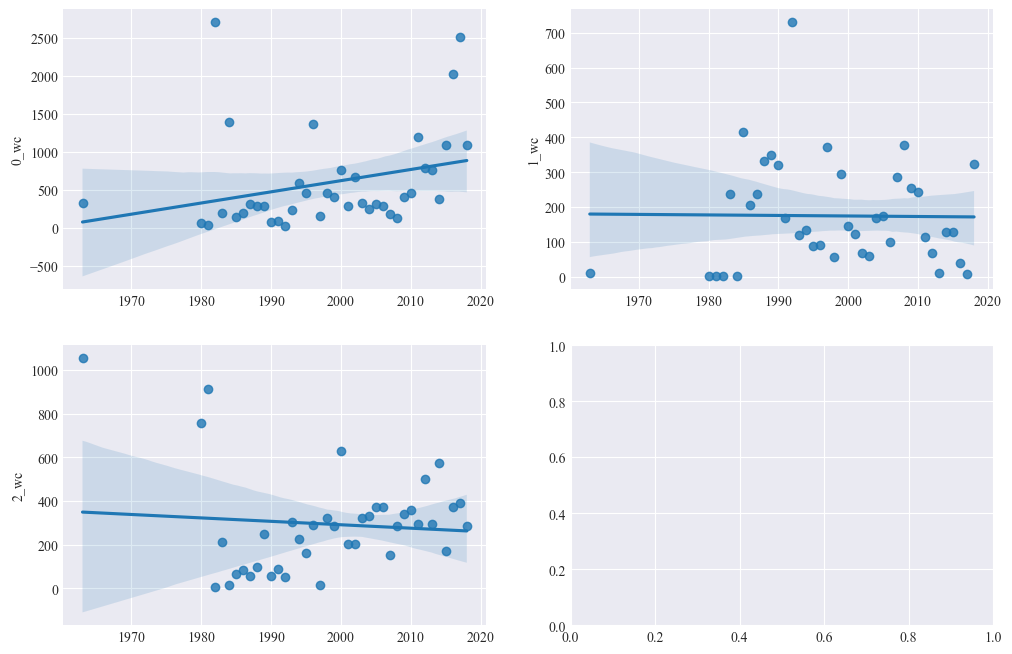

In [143]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
sns.regplot(x=grouped_year_topics.index, y = '0_wc', data = grouped_year_topics, ax=ax[0, 0])
sns.regplot(x=grouped_year_topics.index, y = '1_wc', data = grouped_year_topics, ax=ax[0, 1])
sns.regplot(x=grouped_year_topics.index, y = '2_wc', data = grouped_year_topics, ax=ax[1, 0])
#sns.regplot(x=grouped_year_topics.index, y = '3_wc', data = grouped_year_topics, ax=ax[1, 1])


ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')

for i in range(2):
    for j in range(2):
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['left'].set_visible(False)
        ax[i, j].spines['bottom'].set_visible(False)

## Word Embeddings

In [79]:
%pylab inline
matplotlib.style.use('ggplot')
import os
import numpy as np
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE

Populating the interactive namespace from numpy and matplotlib


/Users/jinyang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'bar']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [80]:
text_sen=[row['Body'] for index, row in combined_df.iterrows()]
sentences_list = []
for i in text_sen:
    sentences = i.split("。")
    result = [sentence for sentence in sentences]
    sentences_list.append(result)

In [81]:
words_by_sentence = [tokenize_zh(sentence) for sentences in sentences_list for sentence in sentences]
words_by_sentence[:5]

[['一阵',
  '世纪末',
  '西方',
  '吹荡',
  '近年来',
  '外国',
  '电影',
  '评论家',
  '电影',
  '艺术',
  '革新',
  '谈论',
  '很多',
  '谈论',
  '牵涉到',
  '法国',
  '新浪潮',
  '电影'],
 ['新浪潮',
  '一阵',
  '世纪末',
  '西方',
  '资本主义',
  '世界',
  '吹荡',
  '西方',
  '国家',
  '电影',
  '发生',
  '影响',
  '本世纪',
  '五十年代',
  '偶然',
  '资产阶级',
  '反动',
  '腐朽',
  '文艺思想',
  '电影',
  '领域',
  '表现',
  '鲜明',
  '时代特征'],
 ['法国', '新浪潮', '电影'],
 ['戴高乐',
  '法国',
  '政权',
  '加紧',
  '阿尔及利亚',
  '侵略战争',
  '庞大',
  '军事',
  '开支',
  '压在',
  '人民',
  '肩膀',
  '物价',
  '高涨',
  '社会',
  '动荡不安',
  '国内',
  '阶级矛盾',
  '尖锐化'],
 ['美帝国主义',
  '日益',
  '疯狂',
  '扩军备战',
  '发出',
  '核战争',
  '恫吓',
  '西方',
  '世界',
  '充满',
  '战争',
  '斯特里']]

In [82]:
# New libarary (not in Anaconda: gensim)
import gensim
model = gensim.models.Word2Vec(words_by_sentence, vector_size=100, window=5, \
                               min_count=2, sg=1, alpha=0.025, epochs=5, batch_words=10000)

In [83]:
model.wv.get_vector('同性恋')

array([-0.20048076,  0.03390614,  0.28269988,  0.40656242,  0.06301733,
       -0.19855954, -0.21056432,  0.45889372, -0.0613605 , -0.24771515,
       -0.09098555, -0.05675616, -0.13956541,  0.36624497,  0.32380053,
        0.18993405, -0.21937776, -0.01563068, -0.22832821, -0.42367527,
       -0.3101768 ,  0.28485933,  0.4156683 , -0.4265236 , -0.45245025,
        0.34675837, -0.11207088,  0.3772824 , -0.4045289 ,  0.5337535 ,
        0.30865866,  0.07444989,  0.19248414, -0.29843858, -0.62986755,
        0.0256639 , -0.08833589, -0.31351405, -0.11740334, -0.04505391,
        0.16029888, -0.35847756, -0.56118894,  0.02150713,  0.9102009 ,
        0.14863232, -0.01765191, -0.1986335 ,  0.53667414, -0.21334833,
       -0.02660181, -0.19331384,  0.34527075, -0.3347467 ,  0.03860485,
        0.7930768 , -0.33333313, -0.07552525, -0.13844053,  0.06778363,
        0.01551868, -0.05012608, -0.03841761,  0.39679167, -0.21119994,
        0.23024149, -0.7697945 ,  0.56929976,  0.00246775,  0.05

In [84]:
model.wv.most_similar('同性恋',topn=30)

[('同性恋者', 0.9235955476760864),
 ('结婚', 0.8353753089904785),
 ('堕胎', 0.8082740902900696),
 ('合法化', 0.7906608581542969),
 ('婚姻', 0.7850428223609924),
 ('公开', 0.7772191762924194),
 ('同性', 0.7766942381858826),
 ('性取向', 0.7572469711303711),
 ('双性恋', 0.7199775576591492),
 ('异性', 0.7190974950790405),
 ('游行', 0.716779351234436),
 ('歧视', 0.7061491012573242),
 ('群体', 0.7058720588684082),
 ('承认', 0.7057941555976868),
 ('禁止', 0.7040446996688843),
 ('倾向', 0.702782392501831),
 ('合法', 0.6985747814178467),
 ('安乐死', 0.6979719996452332),
 ('配偶', 0.6932047605514526),
 ('男性', 0.6914706826210022),
 ('性伴侣', 0.6848317384719849),
 ('身份', 0.6832610964775085),
 ('反对', 0.6830321550369263),
 ('男女', 0.6829246878623962),
 ('吸毒', 0.6811338067054749),
 ('撤销', 0.6769284009933472),
 ('异性恋', 0.6746099591255188),
 ('视为', 0.671552836894989),
 ('有人', 0.6705302000045776),
 ('一方', 0.6688108444213867)]

In [85]:
model.wv.most_similar(positive=['同性恋'], negative=['结婚'])

[('杨雪', 0.17866089940071106),
 ('abcNEWS', 0.12558935582637787),
 ('同性恋者', 0.08185864239931107),
 ('发现', 0.06740299612283707),
 ('爱滋病', 0.05706264078617096),
 ('研究', 0.037919823080301285),
 ('性病', 0.026916157454252243),
 ('传播', 0.023386528715491295),
 ('人群', 0.01707850582897663),
 ('接触', 0.004609351512044668)]

In [86]:
model.wv.most_similar(positive=['同性恋'], negative=['结婚', '艾滋病'])

[('杨雪', 0.04446464776992798),
 ('newsday', -0.00040817048284225166),
 ('abcNEWS', -0.0014280284522101283),
 ('作品', -0.1669912487268448),
 ('出版物', -0.1777641773223877),
 ('网站', -0.21212738752365112),
 ('内容', -0.21885764598846436),
 ('警察', -0.22519941627979279),
 ('故事', -0.23239056766033173),
 ('小说', -0.23826207220554352)]

In [87]:
model.wv.most_similar(positive=['同性恋'], negative=['结婚', '艾滋病', '作品'])

[('newsday', 0.09304168075323105),
 ('abcNEWS', 0.053857240825891495),
 ('杨雪', -0.06952044367790222),
 ('网站', -0.2923518121242523),
 ('警察', -0.30243146419525146),
 ('报道', -0.31110283732414246),
 ('男子', -0.3553115129470825),
 ('总统', -0.35728737711906433),
 ('非洲', -0.38229304552078247),
 ('黑人', -0.3824259638786316)]